- Customer churn : is the percentage of customers who stopped purchasing your business's products or services during a certain period of time. Your customer churn rate indicates how many of your existing customers are not likely to make another purchase from your business.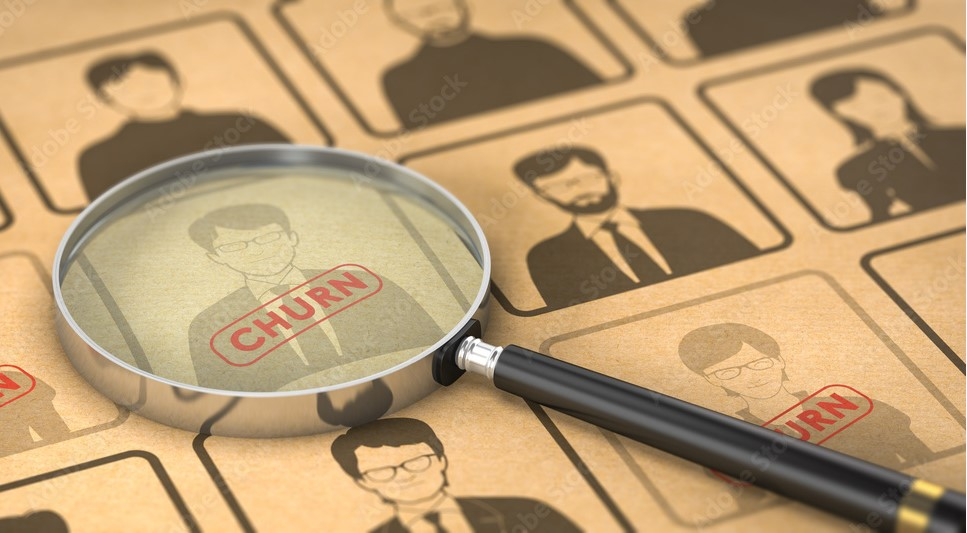


#Libiraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,RobustScaler,PowerTransformer,MinMaxScaler,StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,f1_score,classification_report,roc_curve, roc_auc_score
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier,VotingClassifier,StackingClassifier
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest,chi2,f_classif
import pickle as pkl
import warnings
warnings.filterwarnings("ignore")

#Columns



1.   customerID: customerID😀.
2.   gender: Whether the customer is a male or a female.
3.   SeniorCitizen:Whether the customer is a senior citizen or not (1, 0).
4.   Partner:Whether the customer has a partner or not (Yes, No).
5.   Dependents:Whether the customer has dependents or not (Yes, No).
6.   tenure:Number of months the customer has stayed with the company.
7.   PhoneService:Whether the customer has a phone service or not (Yes, No).
8.   MultipleLines:Whether the customer has multiple lines or not (Yes, No, No phone service).
9.   InternetService:Customer’s internet service provider (DSL, Fiber optic, No).
10.  OnlineSecurity:Whether the customer has online security or not (Yes, No, No internet service).
11.  OnlineBackup:Whether the customer has online backup or not (Yes, No, No internet service).
12.  DeviceProtection:Whether the customer has device protection or not (Yes, No, No internet service).'
13.  TechSupport:Whether the customer has tech support or not (Yes, No, No internet service)
14.  StreamingTV:Whether the customer has streaming TV or not (Yes, No, No internet service).
15.  StreamingMovies:Whether the customer has streaming movies or not (Yes, No, No internet service).
16.  Contract:The contract term of the customer (Month-to-month, One year, Two year).
17.   PaperlessBilling:Whether the customer has paperless billing or not (Yes, No).
18.   PaymentMethod:The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card.).
19.  MonthlyCharges:The amount charged to the customer monthly.
20.  TotalCharges:The total amount charged to the customer.
21.  Churn:Whether the customer churned or not (Yes or No).

**Redeaing Data**

In [ ]:
!pip install kaggle

import os
os.environ['KAGGLE_USERNAME'] = "your_kaggle_username"
os.environ['KAGGLE_KEY'] = "your_kaggle_key"

!kaggle datasets download -d blastchar/telco-customer-churn

!unzip -o telco-customer-churn.zip

import pandas as pd
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

df.head()


Dataset URL: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
License(s): copyright-authors
  0% 0.00/172k [00:00<?, ?B/s]
100% 172k/172k [00:00<00:00, 48.3MB/s]
Archive:  telco-customer-churn.zip
  inflating: WA_Fn-UseC_-Telco-Customer-Churn.csv  


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# <center><div style="font-family: Trebuchet MS; background-color: #670010; color: #ffffff; padding: 12px; line-height: 1;">Exploratory Data Analysis (EDA)</div></center>

**SHhowing Data**

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Check the Shape of Data**

In [ ]:
df.shape

(7043, 21)

**Print the information of the Data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


**Drop the unuseful column**

In [ ]:
df.drop('customerID', axis=1, inplace=True )

cols=df.columns
cols

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

**Function for Details for all Columns**

In [ ]:
info_columns={'Name':[], 'Data_Type':[], 'Null_Values':[], 'Num_of_unique':[], 'Unique_Values':[]}
def info_col(col):
    info_columns['Name'].append(col.name)
    info_columns['Data_Type'].append(col.dtype)
    info_columns['Null_Values'].append(col.isnull().sum())
    info_columns['Num_of_unique'].append(col.nunique())
    if col.nunique() < 10:
        info_columns['Unique_Values'].append(col.unique())
    else:
        info_columns['Unique_Values'].append('More than 10')


**Print the REsult of the Function**

In [ ]:
for col in cols:
    info_col(df[col])

info_columns=pd.DataFrame(info_columns)
info_columns

,Name,Data_Type,Null_Values,Num_of_unique,Unique_Values
0,gender,object,0,2,"[Female, Male]"
1,SeniorCitizen,int64,0,2,"[0, 1]"
2,Partner,object,0,2,"[Yes, No]"
3,Dependents,object,0,2,"[No, Yes]"
4,tenure,int64,0,73,More than 10
5,PhoneService,object,0,2,"[No, Yes]"
6,MultipleLines,object,0,3,"[No phone service, No, Yes]"
7,InternetService,object,0,3,"[DSL, Fiber optic, No]"
8,OnlineSecurity,object,0,3,"[No, Yes, No internet service]"
9,OnlineBackup,object,0,3,"[Yes, No, No internet service]"


In [ ]:
df.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [ ]:
# check what's null?
df.TotalCharges.value_counts().sort_index()

,count
TotalCharges,
,11
100.2,1
100.25,1
100.35,1
100.4,1
...,...
997.75,1
998.1,1
999.45,1


**Trying to fid the Relation between tenure and Monthlycharges**

In [ ]:
df['tenure x MonthlyCharges']=df['tenure'] * df['MonthlyCharges']

df[['tenure','MonthlyCharges','TotalCharges','tenure x MonthlyCharges']]

,tenure,MonthlyCharges,TotalCharges,tenure x MonthlyCharges
0,1,29.85,29.85,29.85
1,34,56.95,1889.5,1936.30
2,2,53.85,108.15,107.70
3,45,42.30,1840.75,1903.50
4,2,70.70,151.65,141.40
...,...,...,...,...
7038,24,84.80,1990.5,2035.20
7039,72,103.20,7362.9,7430.40
7040,11,29.60,346.45,325.60
7041,4,74.40,306.6,297.60


***Convert the 'totalCharges' culumn to numeric and replace the object values with NaN***

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce',)

**Replace the NaN values in TotalCharges with its MonthlyCharges**

In [ ]:
df['TotalCharges'].fillna(df['MonthlyCharges'], inplace=True)

In [ ]:
df.TotalCharges.value_counts().sort_index()

,count
TotalCharges,
18.80,1
18.85,2
18.90,1
19.00,1
19.05,1
...,...
8564.75,1
8594.40,1
8670.10,1


## Check Null of the Data

In [ ]:
df.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


## Check the Dublicated Data

In [ ]:
df.duplicated().sum()

22

## Hundling the Dublicated Data

In [ ]:
df.drop_duplicates(inplace=True)

# <center><div style="font-family: Trebuchet MS; background-color: #670010; color: #ffffff; padding: 12px; line-height: 1;">Visualization</div></center>

>Numirical columns

- The Relation Between Numeric Culumns and The Output

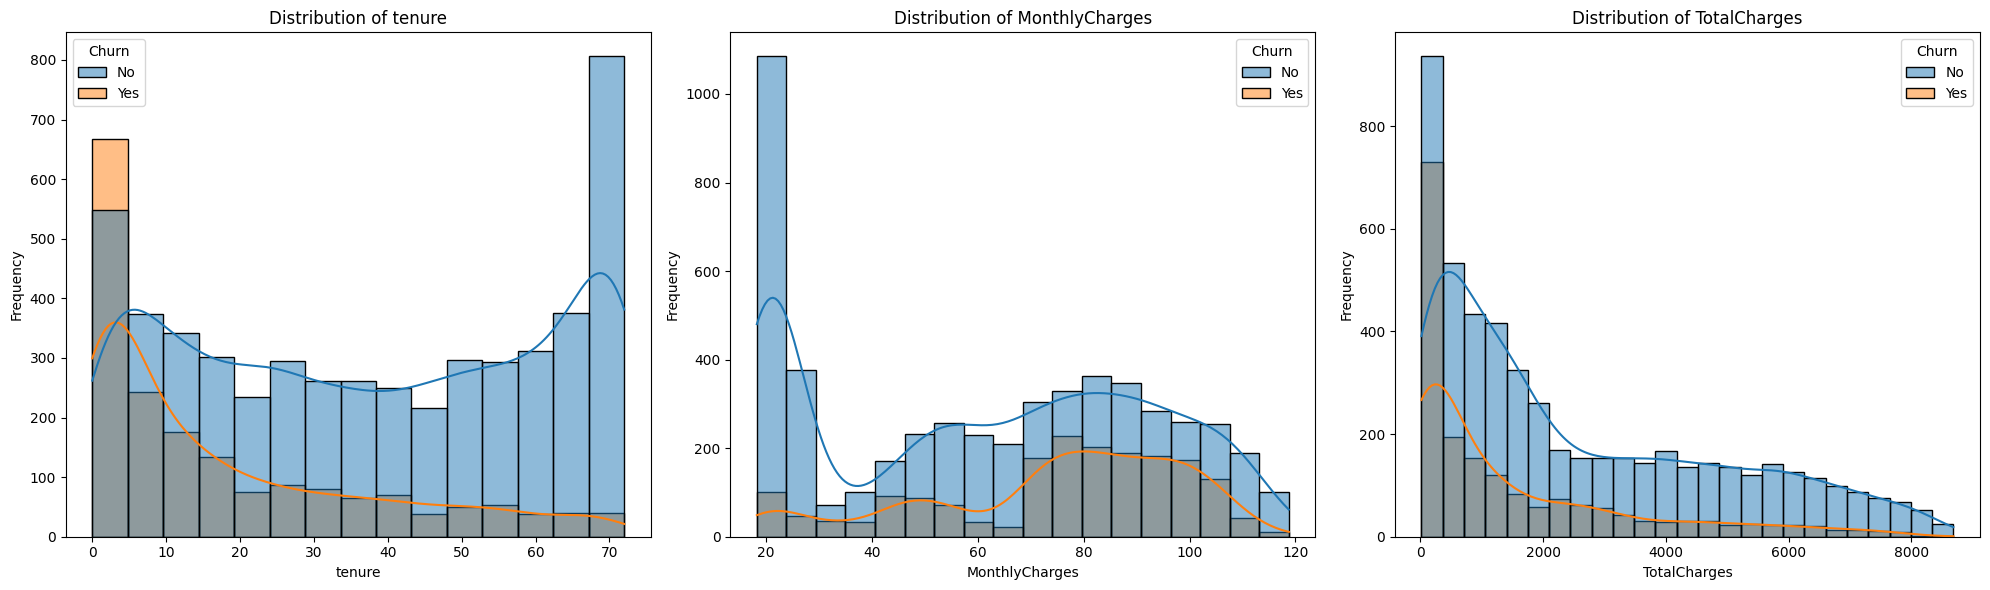

In [ ]:
num_col=['tenure','MonthlyCharges','TotalCharges']

plt.figure(figsize=(20, 6))
for i,col in enumerate(num_col,1):
    plt.subplot(1,3,i)
    sns.histplot(data=df, x=df[col], kde=True, hue='Churn')
    plt.title(f'Distribution of {col}')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

#When the number of months increase the number of churn decrease.

#People that pay between 20 to 30 monthly are the most loyal people to the company, however the most people churn are between 70 to 100 monthly.

#Most of people churn in the first year.

- Drawing the Relation between MothlyCharges and TotalCharges

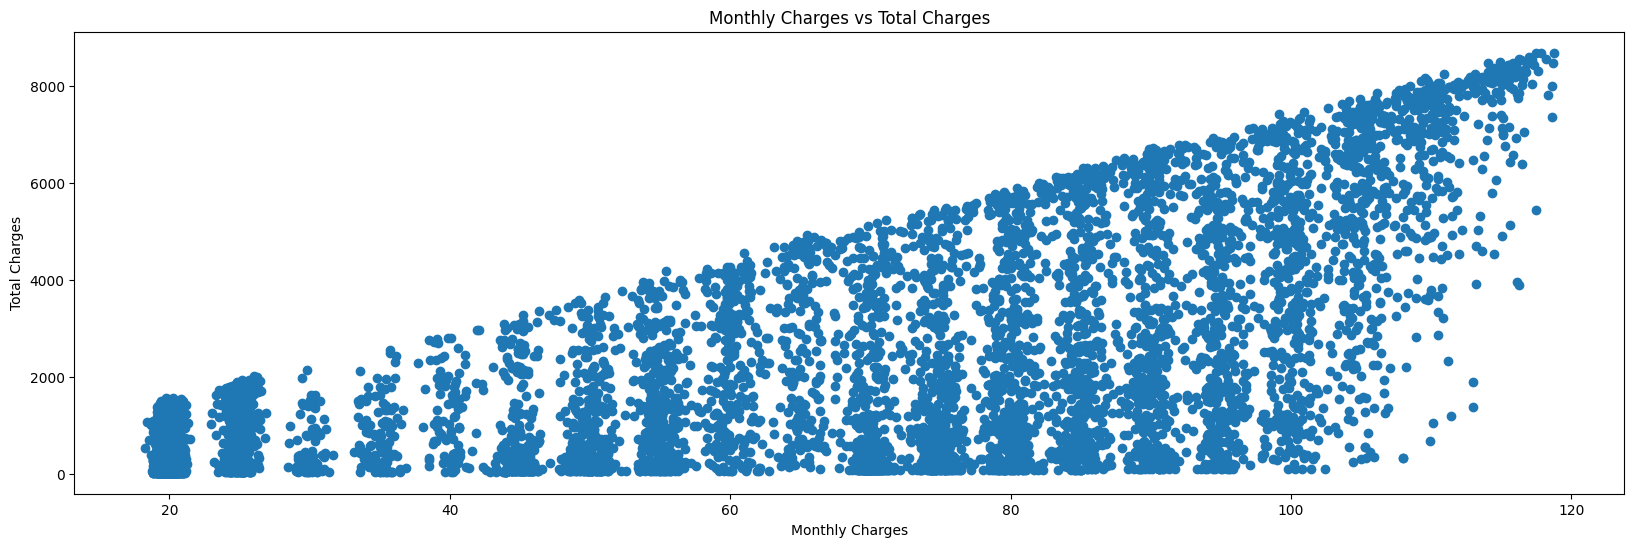

In [ ]:
plt.figure(figsize=(20, 6))
plt.scatter(df['MonthlyCharges'], df['TotalCharges'])
plt.title('Monthly Charges vs Total Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.show()
# It shows the destribution between monthly charges and total charges

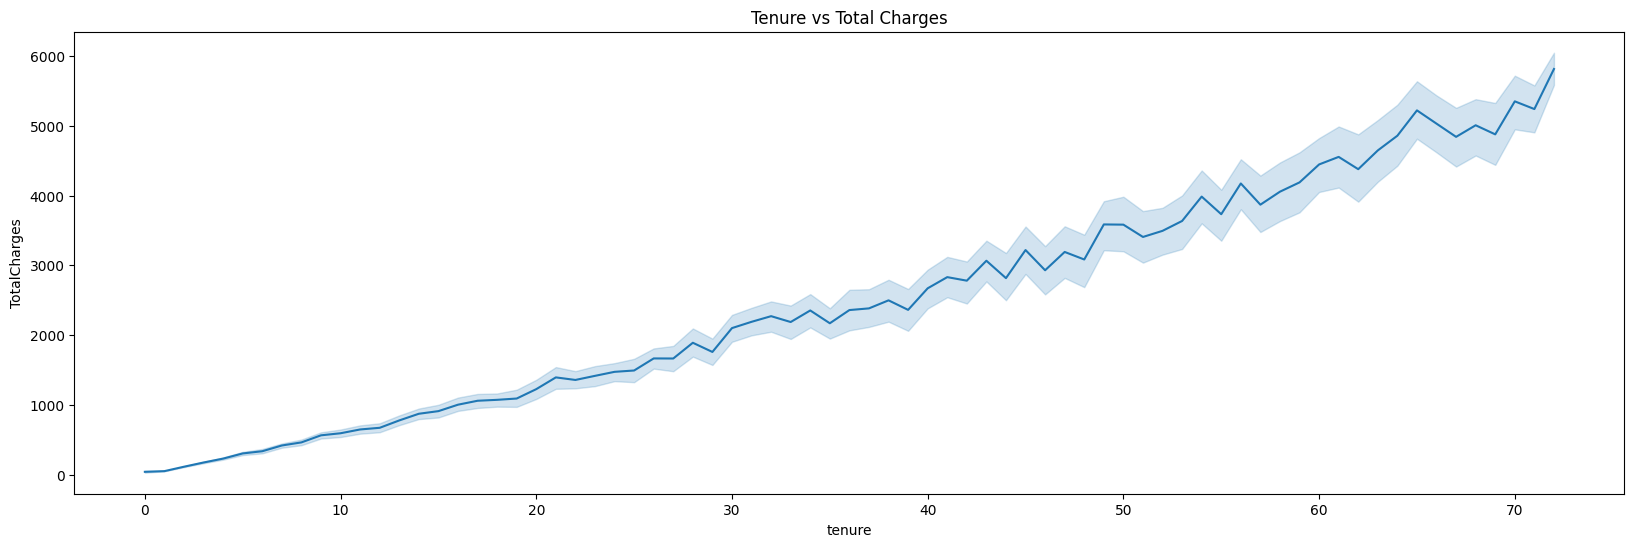

In [ ]:
plt.figure(figsize=(20, 6))
sns.lineplot(x=df['tenure'], y=df['TotalCharges'])
plt.title('Tenure vs Total Charges')

plt.show()

- check the outlires

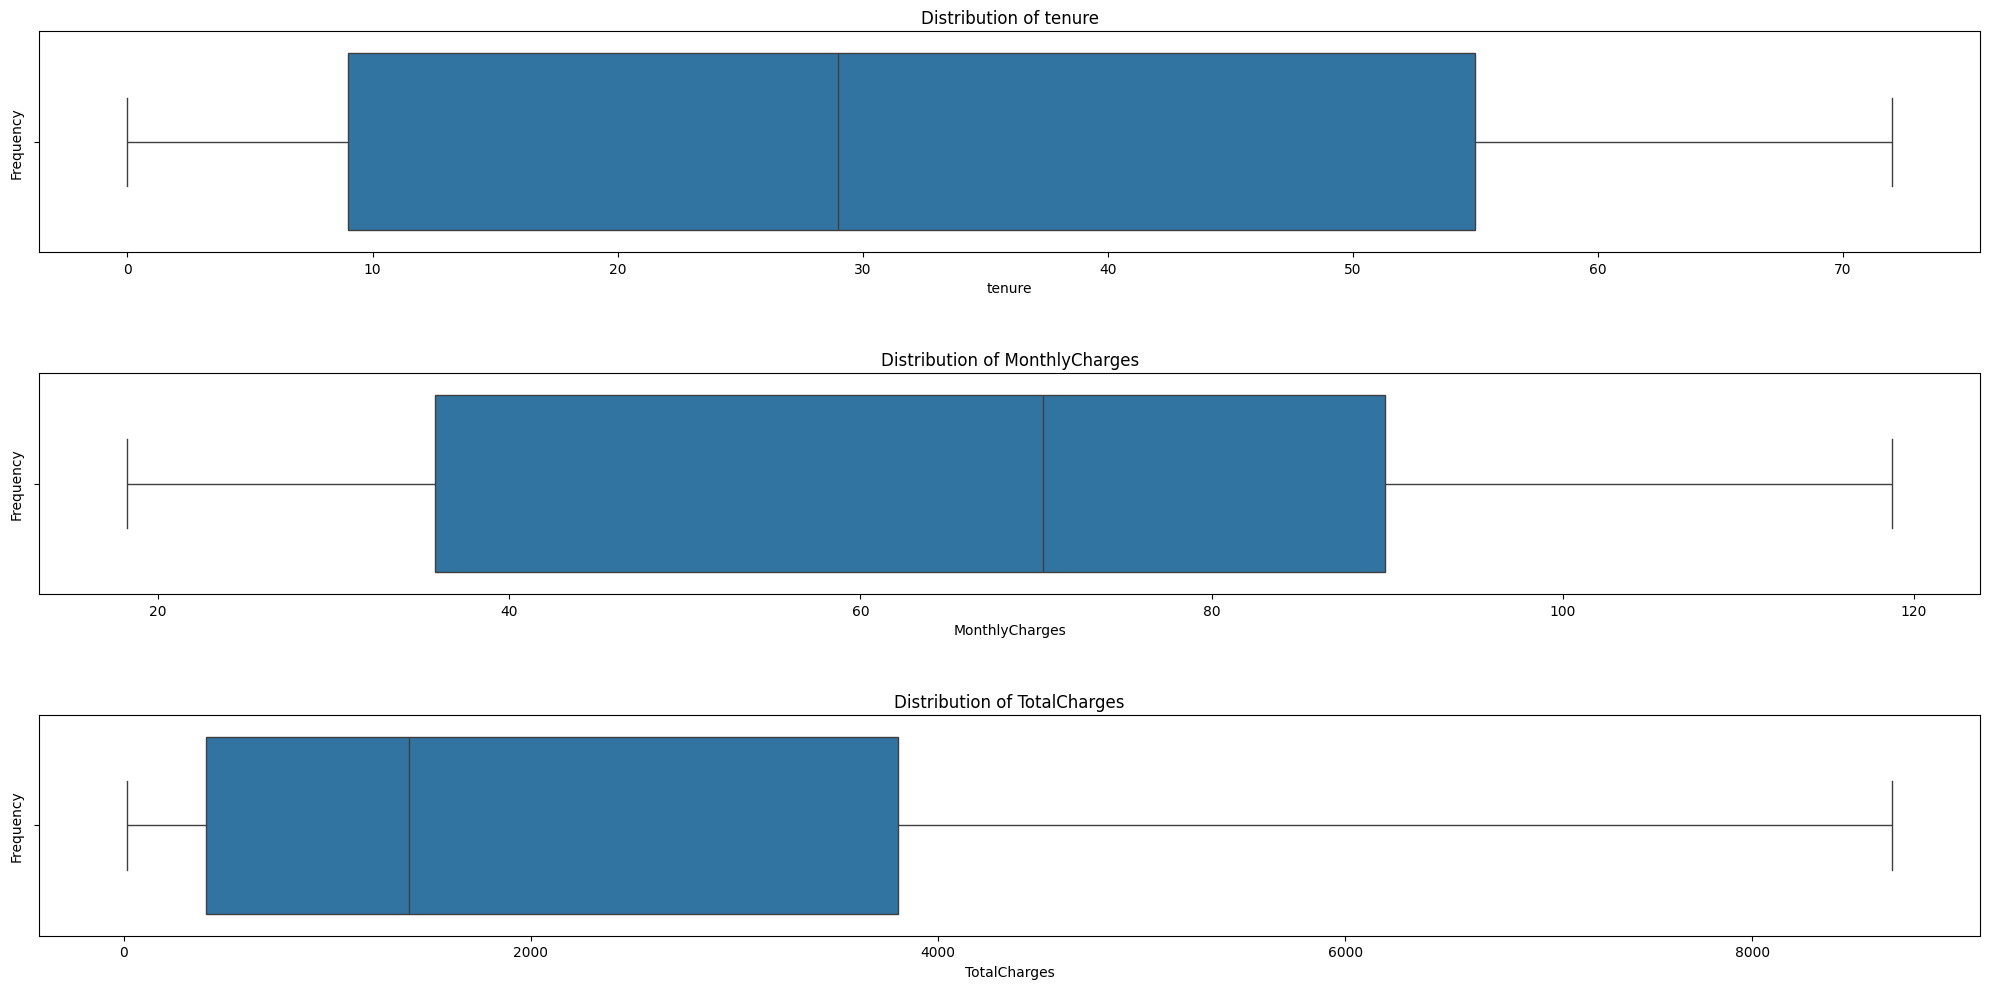

In [ ]:
plt.figure(figsize=(20, 10))
for i,col in enumerate(num_col,1):
    plt.subplot(3,1,i)
    sns.boxplot(x=df[col],)
    plt.title(f'Distribution of {col}')
    plt.ylabel('Frequency')

plt.tight_layout(h_pad=4)
plt.show()

 > Object columns

In [ ]:
cat_col=df.select_dtypes('object').columns
cat_col

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

- Viewing All Categorical coulmns

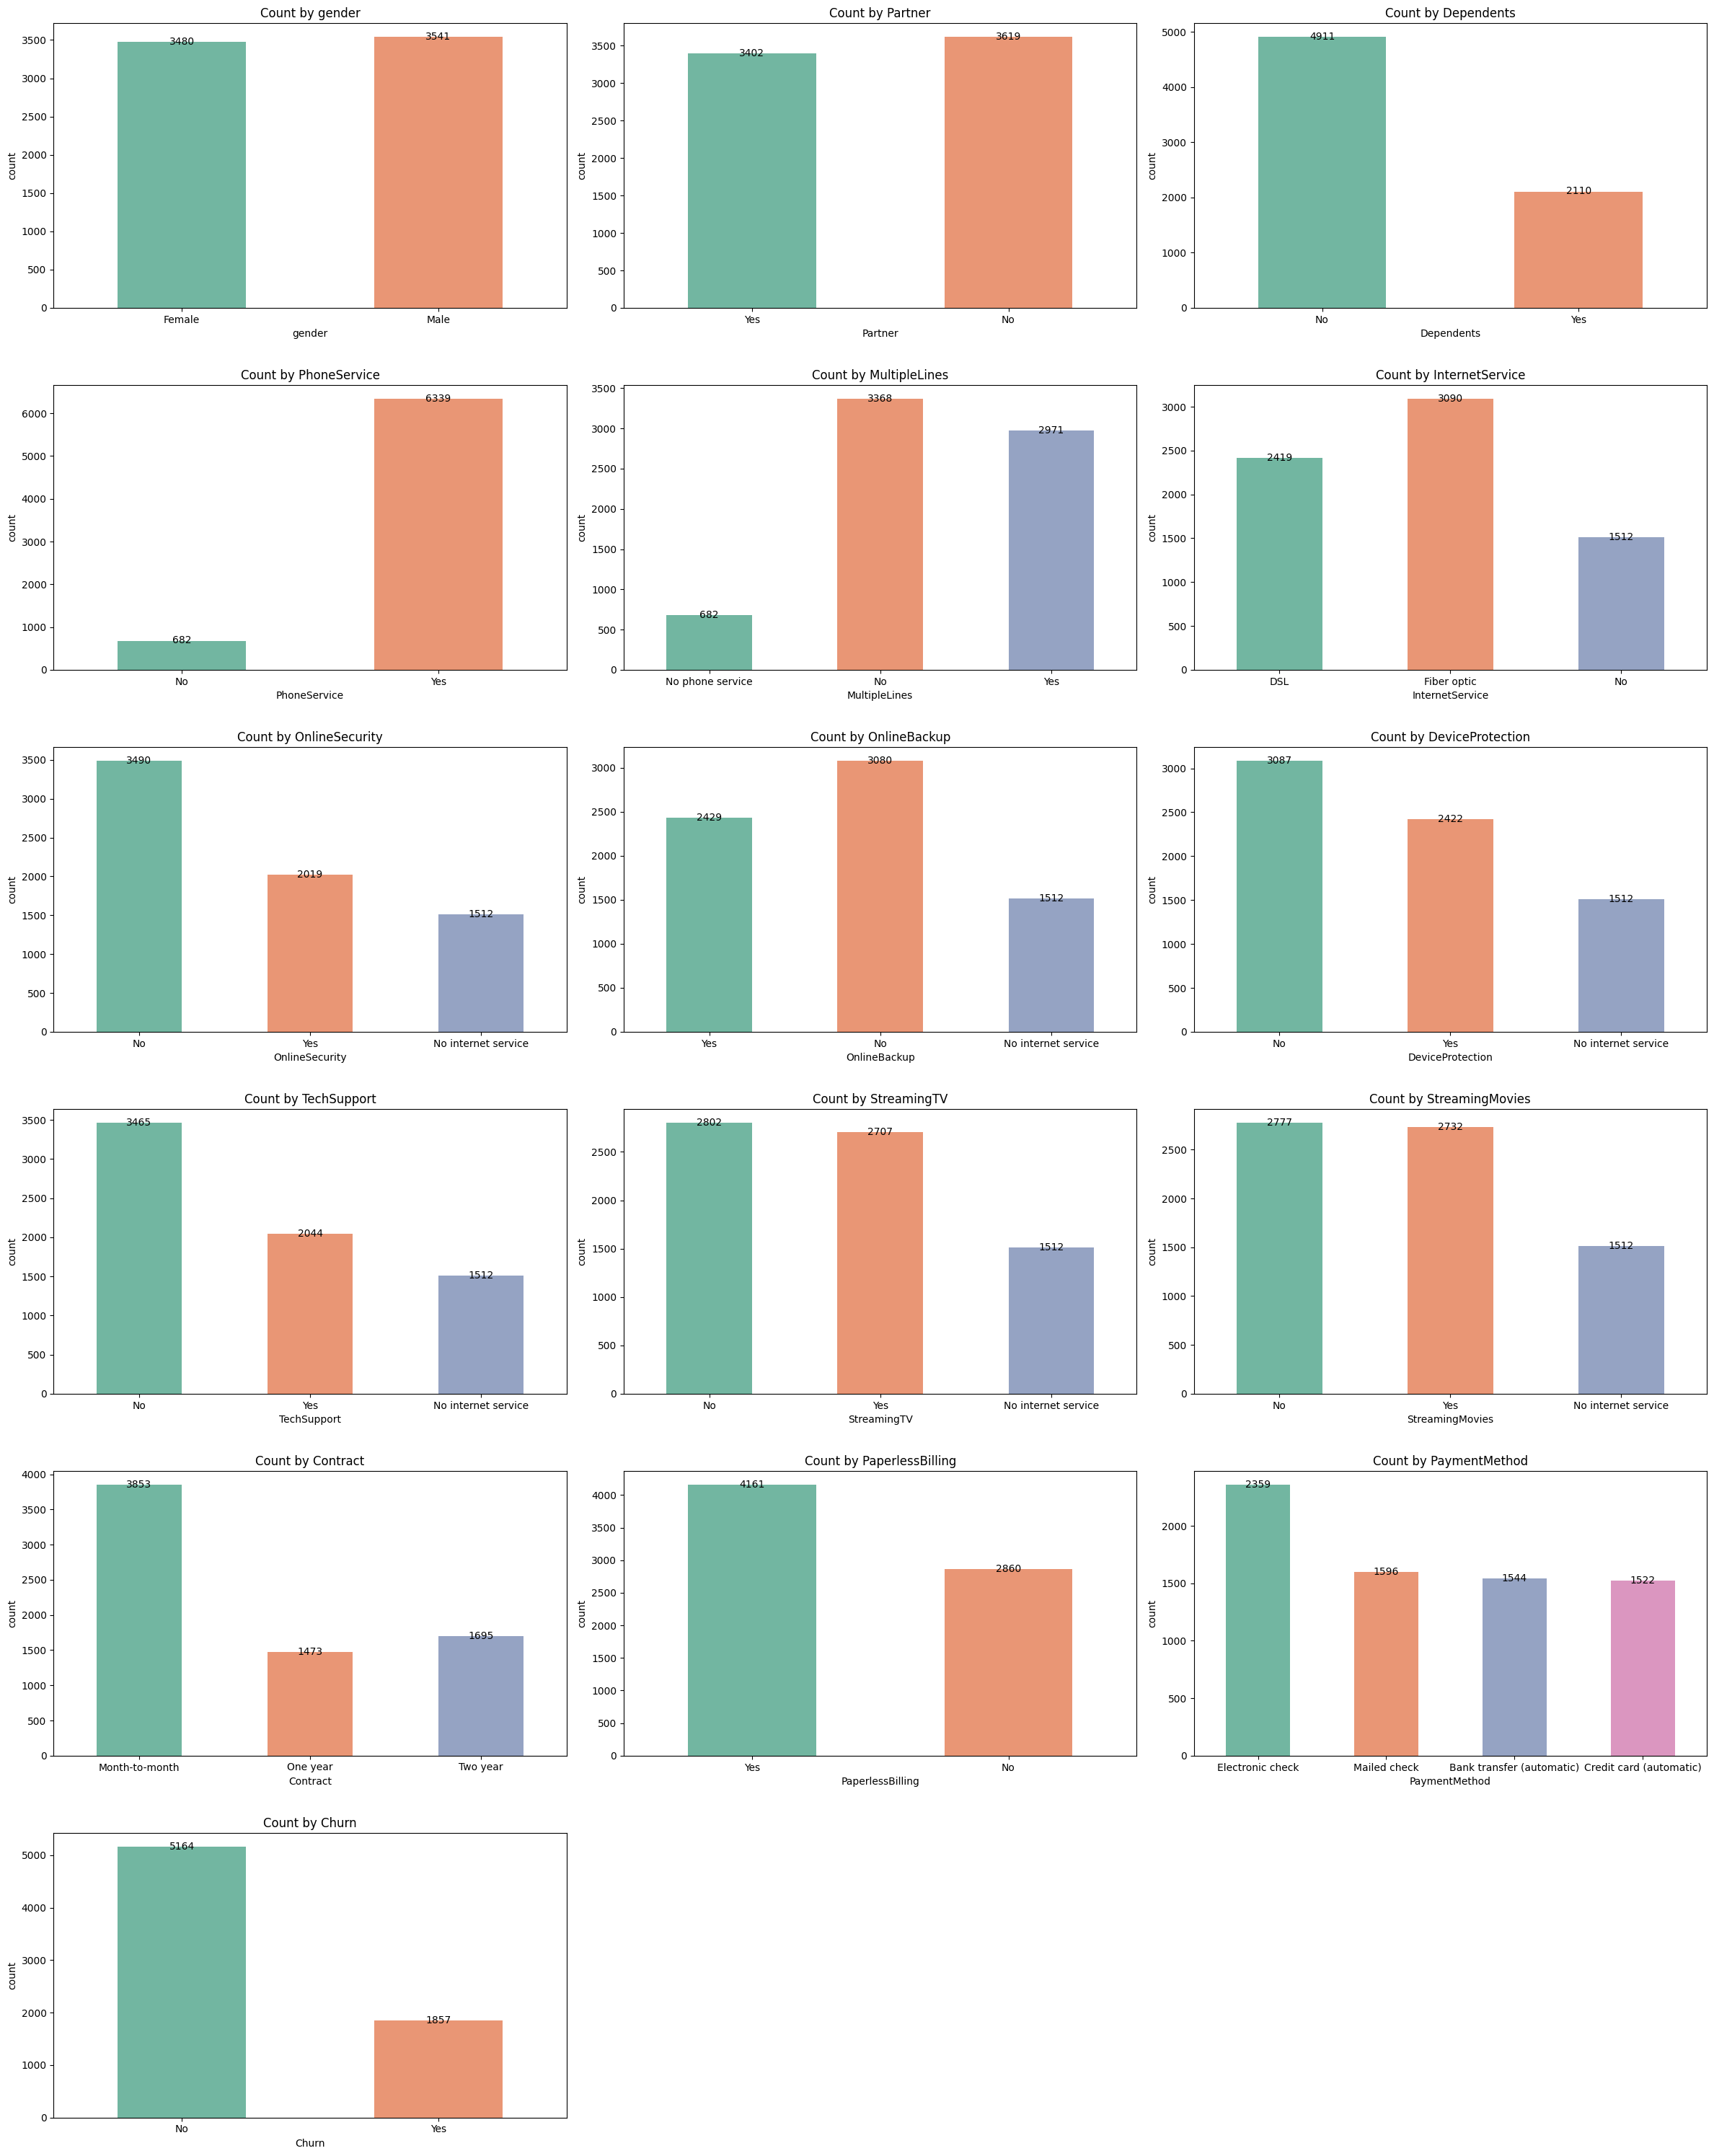

In [ ]:
plt.figure(figsize=(24,30))
for i,col in enumerate(cat_col,1):
    plt.subplot(6,3,i)

    sns.countplot(data = df ,x = col, palette='Set2',width=0.5,)

    for p in plt.gca().patches:
        plt.text(p.get_x() + p.get_width() / 2, p.get_height() + 0.5, int(p.get_height()), ha='center', va='center')

    plt.title(f'Count by {col}')
plt.tight_layout(h_pad=3)
plt.show()

- Transfere tenure to bins

In [ ]:
#df.drop('tenure_group',axis=1,inplace=True)
bins = [0, 12, 24, 36, 48, 60, df['tenure'].max()]
labels = ['0-1 Year', '1-2 Years', '2-3 Years', '3-4 Years','4-5 Years', '>5 Years']
df['tenure_group'] = pd.cut(df['tenure'], bins=bins, labels=labels)


- Showing the distrbution of Tenure

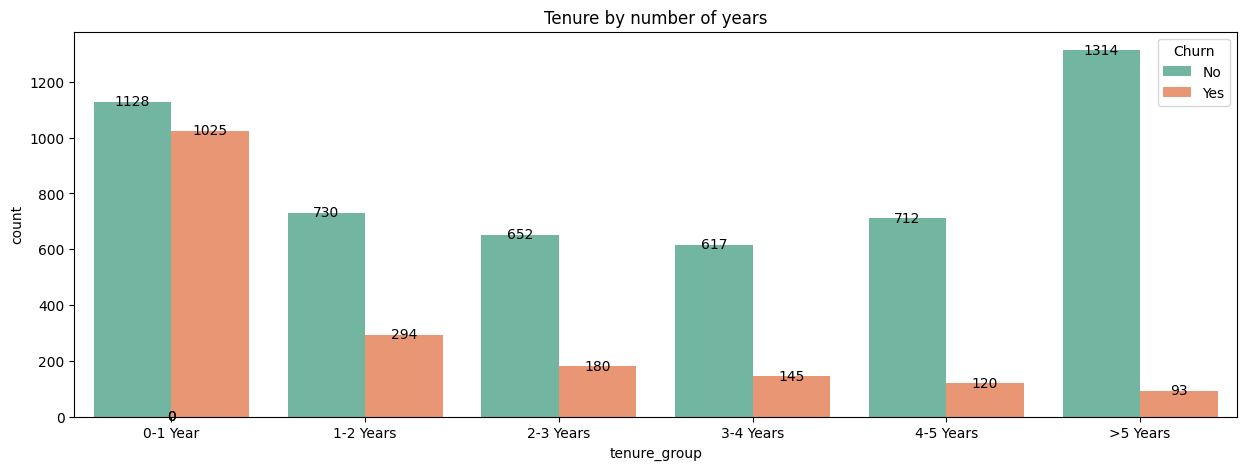

In [ ]:

plt.figure(figsize=(15,5))
sns.countplot(x=df.tenure_group,data=df,hue = 'Churn',palette='Set2')

for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height() + 0.5, int(p.get_height()), ha='center', va='center')

plt.title('Tenure by number of years')
plt.show()

- Columns include Service

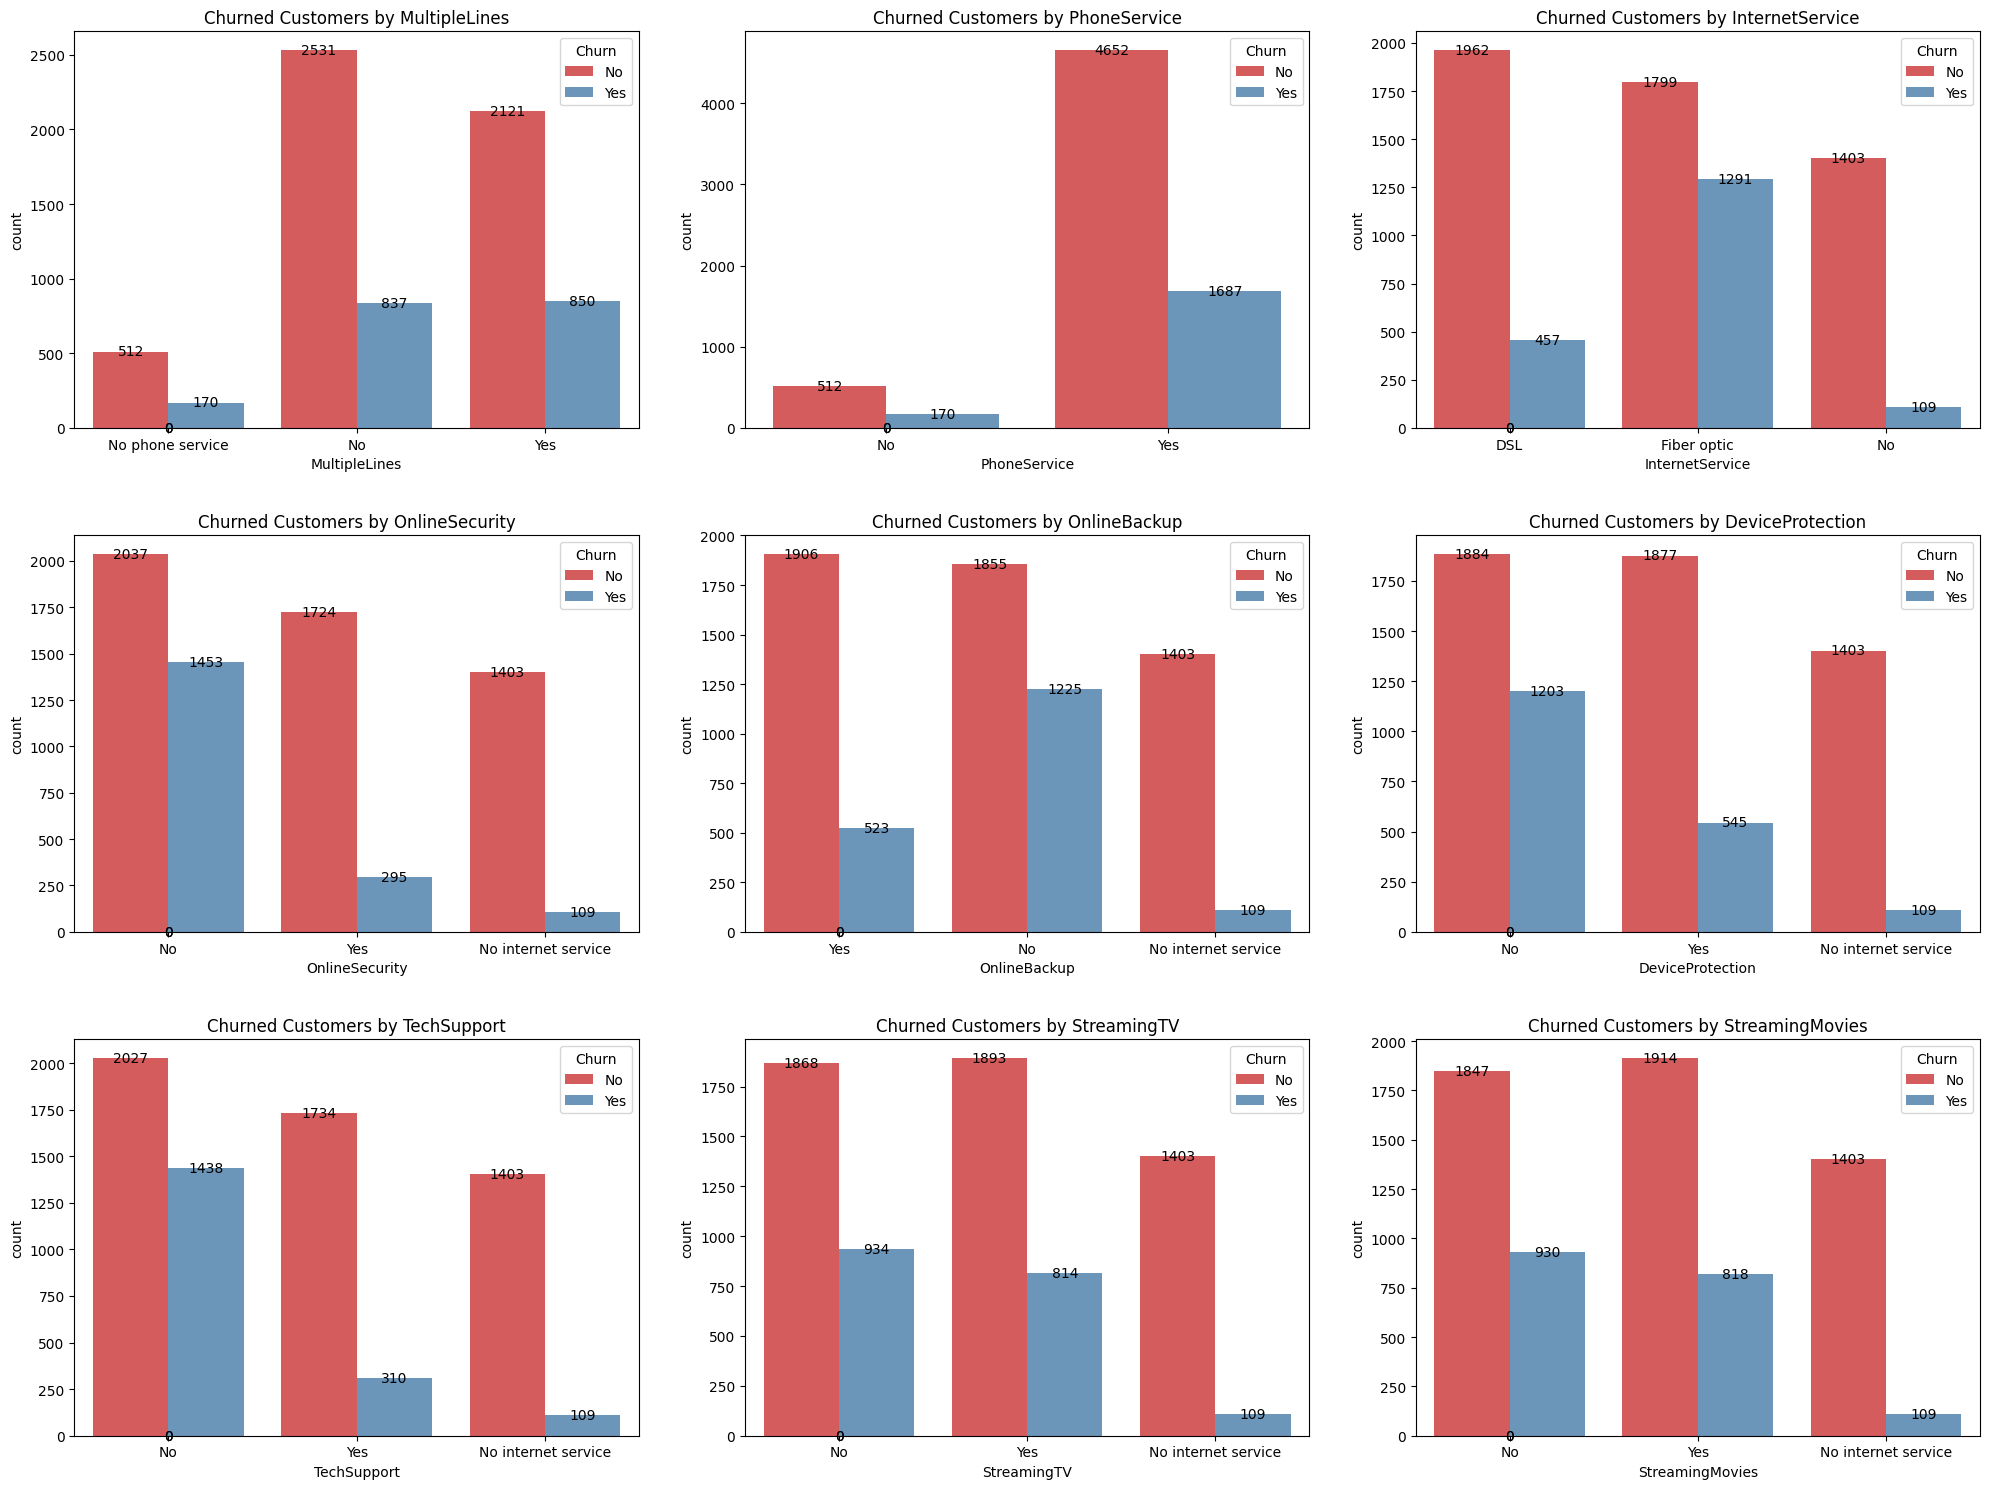

In [ ]:
col_service=['MultipleLines', 'PhoneService', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies']

plt.figure(figsize=(20,15))
for i,col in enumerate(col_service,1):
    plt.subplot(3,3,i)
    sns.countplot(data = df ,x = col, hue = 'Churn', palette='Set1',alpha=.8)

    for p in plt.gca().patches:
        plt.text(p.get_x() + p.get_width() / 2, p.get_height() + 0.5, int(p.get_height()), ha='center', va='center')

    plt.title(f'Churned Customers by {col}')
plt.tight_layout(h_pad=3,w_pad=3)

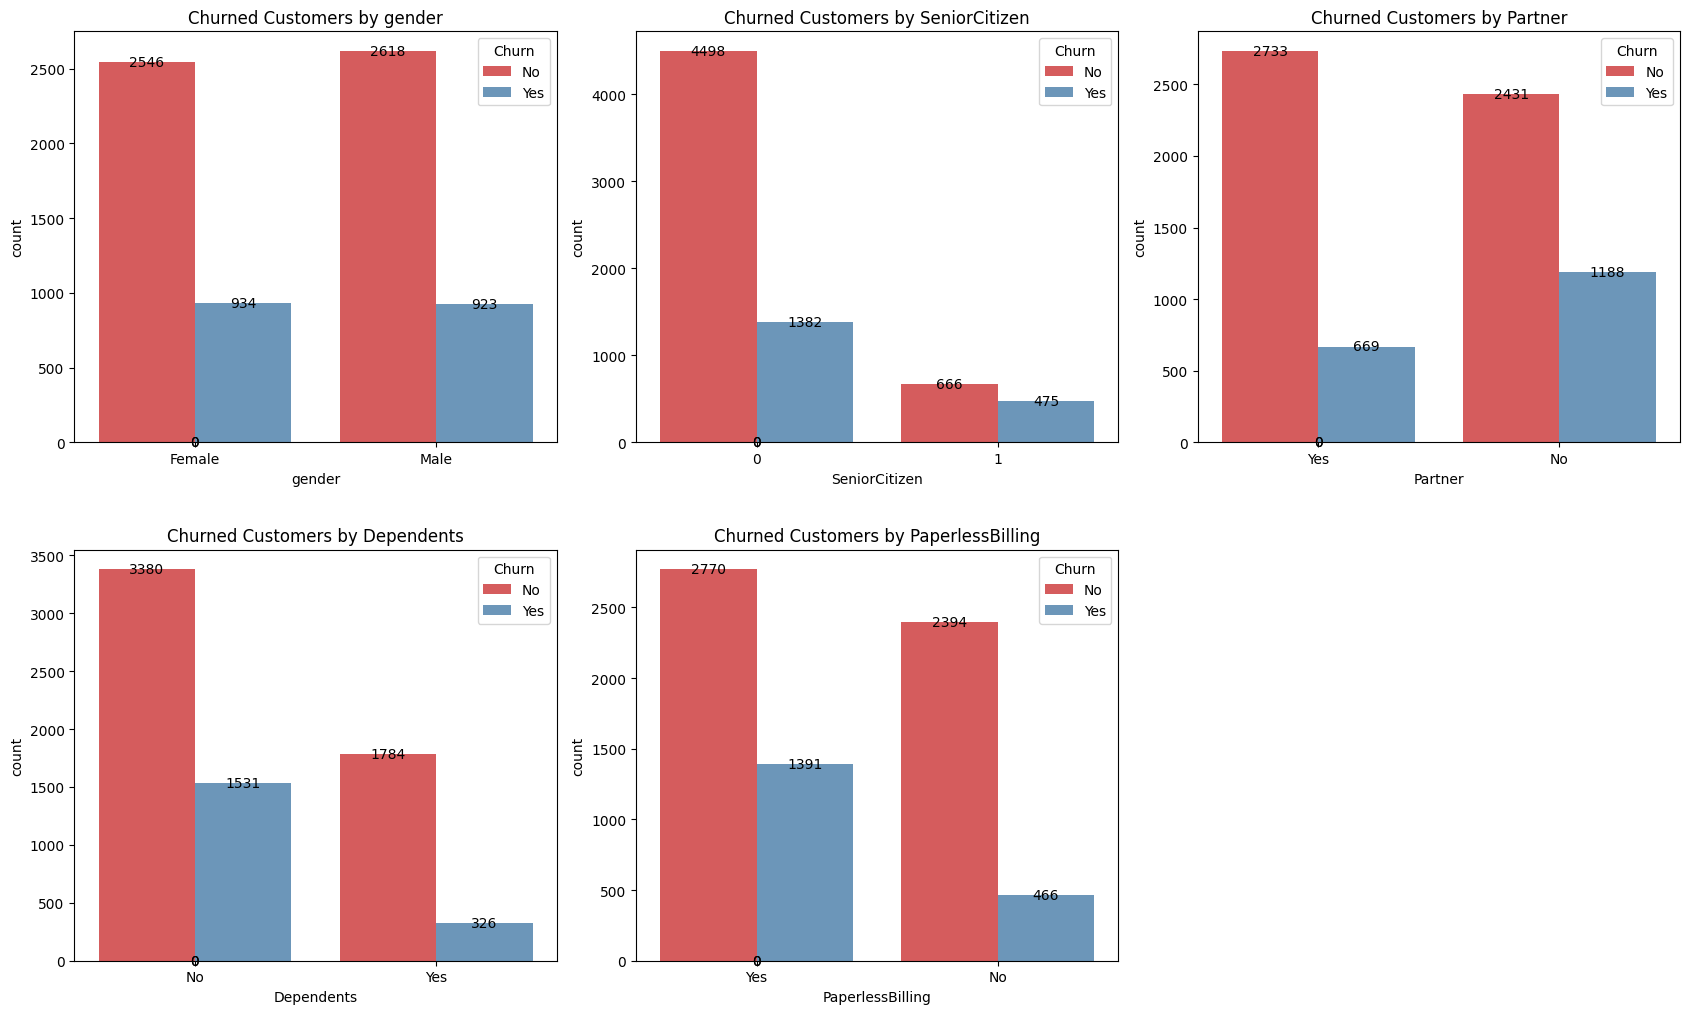

In [ ]:
col_2output=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PaperlessBilling']

plt.figure(figsize=(17,15))
for i,col in enumerate(col_2output,1):
    plt.subplot(3,3,i)
    sns.countplot(data = df ,x = col, hue = 'Churn', palette='Set1',alpha=.8)

    for p in plt.gca().patches:
        plt.text(p.get_x() + p.get_width() / 2, p.get_height() + 0.5, int(p.get_height()), ha='center', va='center')

    plt.title(f'Churned Customers by {col}')
plt.tight_layout(h_pad=3)

- The Relation between Contract and paymentMethod

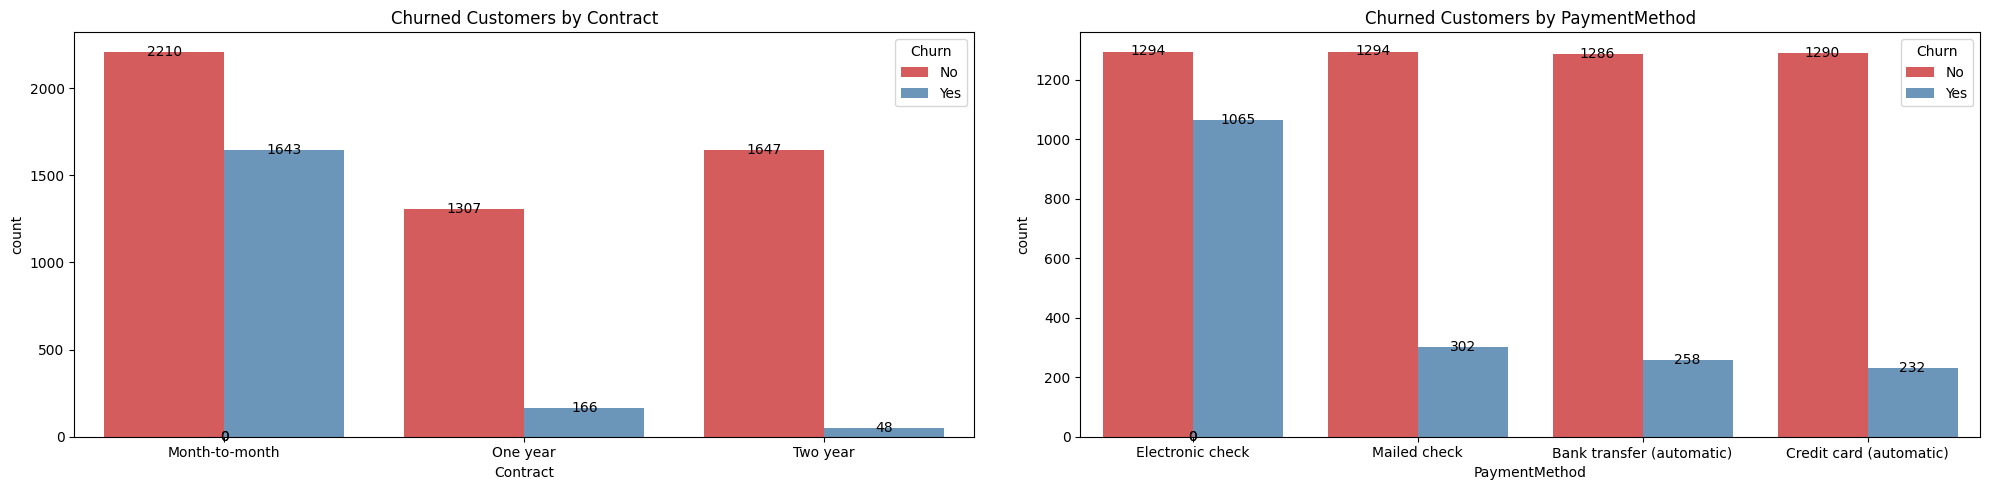

In [ ]:
plt.figure(figsize=(20,5))
for i,col in enumerate(['Contract','PaymentMethod'],1):
    plt.subplot(1,2,i)
    sns.countplot(data = df ,x = col, hue = 'Churn', palette='Set1',alpha=.8)

    for p in plt.gca().patches:
        plt.text(p.get_x() + p.get_width() / 2, p.get_height() + 0.5, int(p.get_height()), ha='center', va='center')

    plt.title(f'Churned Customers by {col}')
plt.tight_layout(h_pad=5,w_pad=3)

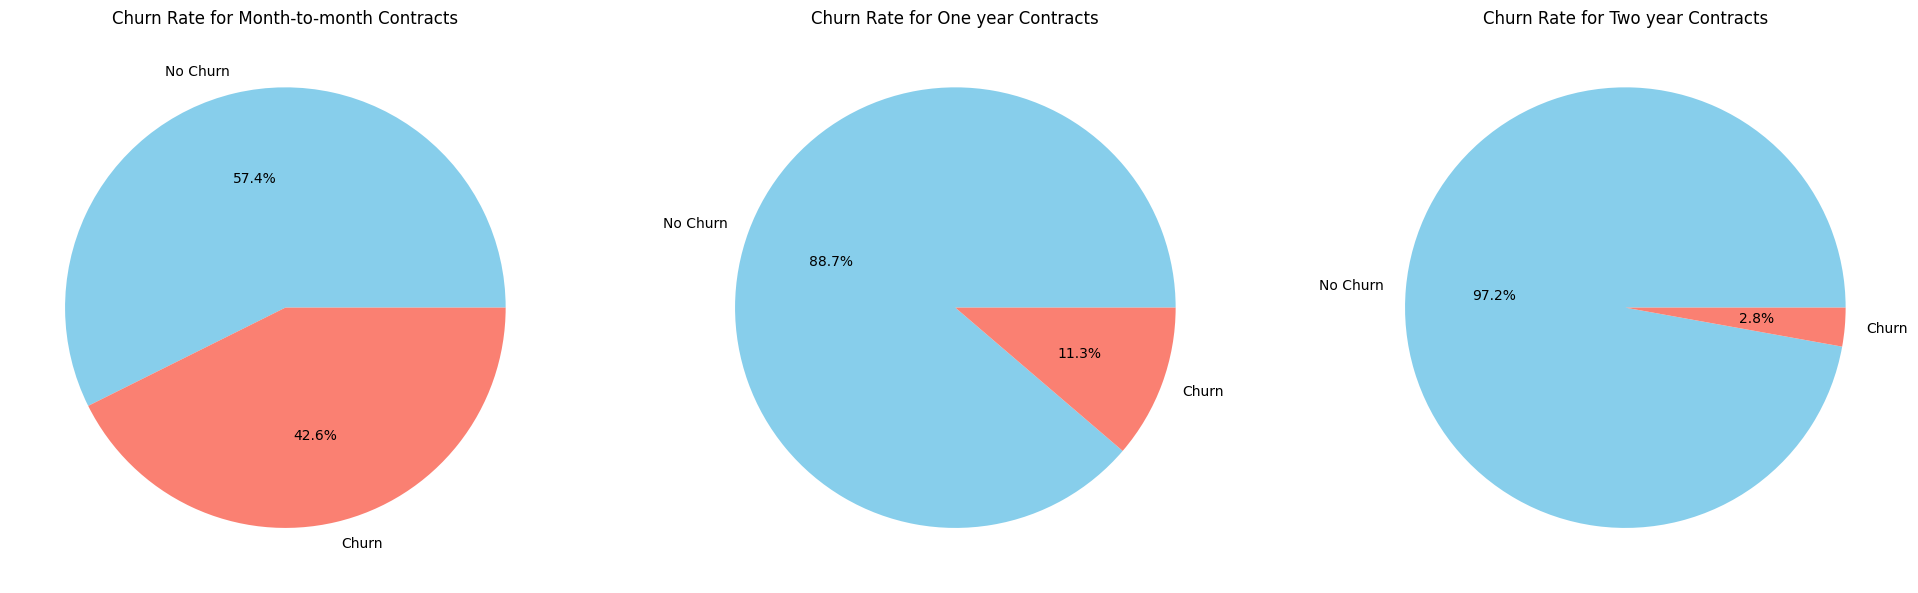

In [ ]:
Sub_Contract=['Month-to-month','One year','Two year']

plt.figure(figsize=(20,6))
for i,contract in enumerate(Sub_Contract,1):
    plt.subplot(1,3,i)
    plt.pie(df[df['Contract'] == contract]['Churn'].value_counts(), labels=['No Churn', 'Churn'], autopct='%1.1f%%',colors=['SkyBlue','Salmon'])
    plt.title(f'Churn Rate for {contract} Contracts')
plt.tight_layout()
plt.show()


- The relation between Tenure and contract

In [ ]:
dd=df.groupby(['tenure','Contract'])['Contract'].count()
dd

tenure  Contract      
0       One year            1
        Two year           10
1       Month-to-month    582
        One year            7
        Two year            2
                         ... 
71      One year           28
        Two year          137
72      Month-to-month      2
        One year           17
        Two year          343
Name: Contract, Length: 218, dtype: int64

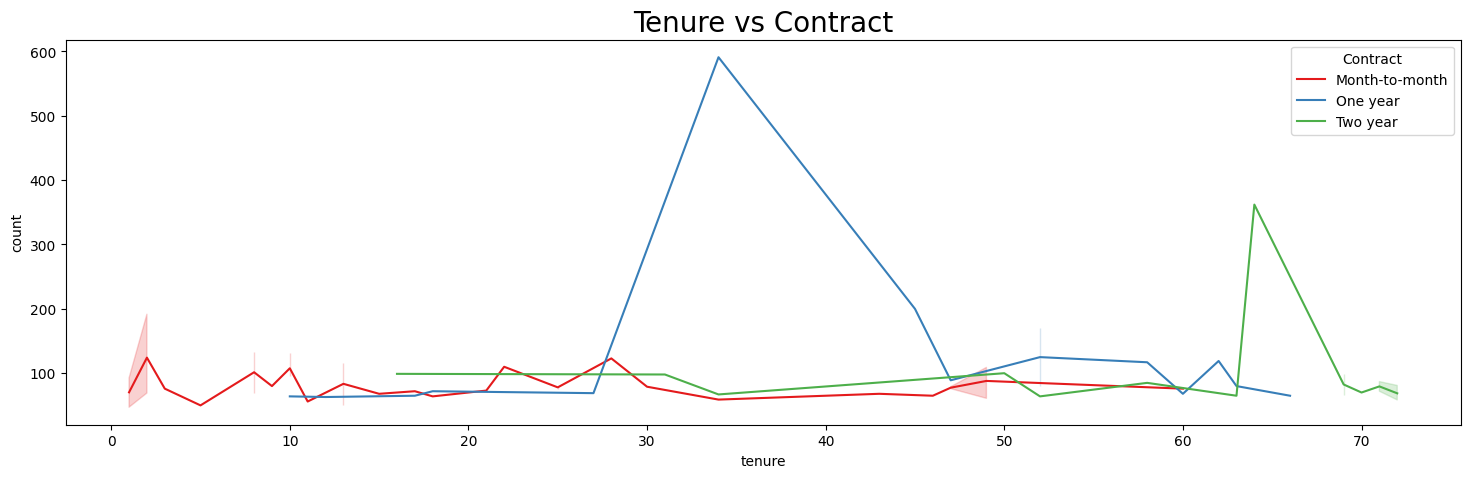

In [ ]:
plt .figure(figsize=(18,5))
sns.lineplot(data = df ,x = 'tenure',y=df['tenure'].value_counts(), hue = 'Contract', palette='Set1')
plt.title('Tenure vs Contract',size=20)
plt.show()

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [965, 992, 219, 240],
  name = 'DSL'
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [889, 910, 664, 633],
  name = 'Fiber optic',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [690, 717, 56, 57],
  name = 'No Internet',
))

fig.update_layout(title_text="<b>Churn Distribution w.r.t. Internet Service and Gender</b>")
fig.show()
#most people that stay are using DSL
#most people that leave using Fiber Optical

# <center><div style="font-family: Trebuchet MS; background-color: #670010; color: #ffffff; padding: 12px; line-height: 1;">Summary of EDA</div></center>

### Order / Values of features for customer churn cases :

- **Categorical Features (Order) :**
    - gender : Male = Female
    - SeniorCitizen : No SeniorCitizen > SeniorCitizen
    - Partner : No Partner > Partner
    - Dependents : No Dependent > Dependent
    - PhoneService : PhoneService > No PhoneService
    - MultipleLines : MultipleLines > No MultipleLines > No PhoneService
    - InternetService : Fiber Optic > DSL > No InternetService
    - OnlineSecurity : Absent > Present > No InternetService
    - OnlineBackup : Absent > Present > No InternetService
    - DeviceProtection : Absent > Present > No InternetService
    - TechSupport : Absent > Present > No InternetService
    - StreamingTV : Absent > Present > No InternetService
    - StreamingMovies : Absent > Present > No InternetService
    - Contract : Month-to-Month > One year > Two year
    - PaperlessBilling : Present > Absent
    - PaymentMethod : Electronic check > Mailed check > Bank Transfer (automatic) > Credit Card (automatic)!


- **Numerical Features (Range) :**
    - tenure : 1 - 5 months
    - MonthlyCharges : 65 - 105
    - TotalCharges : 0 - 1000
    
**According to the EDA, these order / range of values results in customer churn!**

# <center><div style="font-family: Trebuchet MS; background-color: #670010; color: #ffffff; padding: 12px; line-height: 1;">Preprocessing</div></center>

- drop tenure_group, tenure x MonthlyCharges columns

In [ ]:
df.drop(columns = ['tenure_group','tenure x MonthlyCharges'],axis=1,inplace = True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


- Replace people that havn't internet service with No
- Replace people that havn't Phone service with No


In [ ]:
df.replace('No internet service', 'No', inplace=True)
df.replace('No phone service', 'No', inplace=True)

- Replace yes with 1 and No with 0 in all columns

In [ ]:
def replace_yes_no(df, columns):

    for col in columns:
        df[col] = df[col].replace({'Yes': 1, 'No': 0})

columns_to_replace = [
    "Partner", "Dependents", "PhoneService",'MultipleLines', "OnlineSecurity", "OnlineBackup",
    "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies",
    "PaperlessBilling", "Churn"
]

replace_yes_no(df, columns_to_replace)

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


## Encoding

- OrdinalEncoder Encoding for Contract

In [ ]:

categories = [['Month-to-month','One year','Two year']]
oe = OrdinalEncoder(categories = categories)
df['Contract'] = oe.fit_transform(df[['Contract']])
pkl.dump(oe,open('Contract_oe.pkl','wb'))

df['Contract'].value_counts()

,count
Contract,
0.0,3853
2.0,1695
1.0,1473


- LabelEncoder

In [ ]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
categorical_cols

Index(['gender', 'InternetService', 'PaymentMethod'], dtype='object')

In [ ]:
le=LabelEncoder()
for col in categorical_cols:
    df[col]=le.fit_transform(df[col])
    pkl.dump(le,open(f'{col}_le.pkl','wb'))

>Using LabelEncoder for The Data that don't have to order

## Feature Selection
- **Chi2**

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

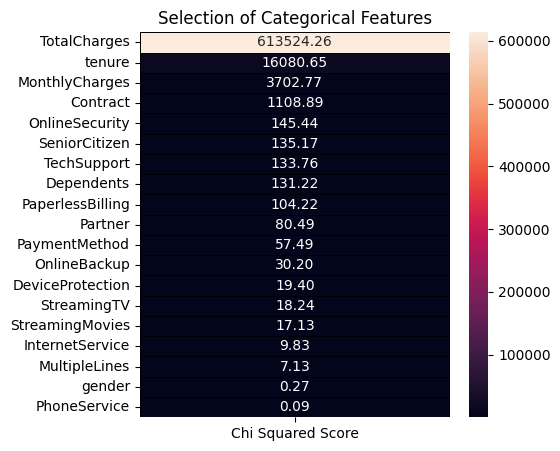

In [ ]:
features = df.drop('Churn',axis=1)
target = df['Churn']

best_features = SelectKBest(score_func = chi2, k = 'all')
fit = best_features.fit(features, target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score'])

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

- Drop unuseful columns

In [ ]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0.0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1.0,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0.0,1,3,53.85,108.15,1


## Checking the Data and Columns

In [ ]:
info_columns={'Name':[], 'Data_Type':[], 'Null_Values':[], 'Num_of_unique':[], 'Unique_Values':[]}

for col in df.columns:
    info_col(df[col])

info_columns=pd.DataFrame(info_columns)
info_columns

,Name,Data_Type,Null_Values,Num_of_unique,Unique_Values
0,gender,int64,0,2,"[0, 1]"
1,SeniorCitizen,int64,0,2,"[0, 1]"
2,Partner,int64,0,2,"[1, 0]"
3,Dependents,int64,0,2,"[0, 1]"
4,tenure,int64,0,73,More than 10
5,PhoneService,int64,0,2,"[0, 1]"
6,MultipleLines,int64,0,2,"[0, 1]"
7,InternetService,int64,0,3,"[0, 1, 2]"
8,OnlineSecurity,int64,0,2,"[0, 1]"
9,OnlineBackup,int64,0,2,"[1, 0]"


## Checking the Balance of the Data

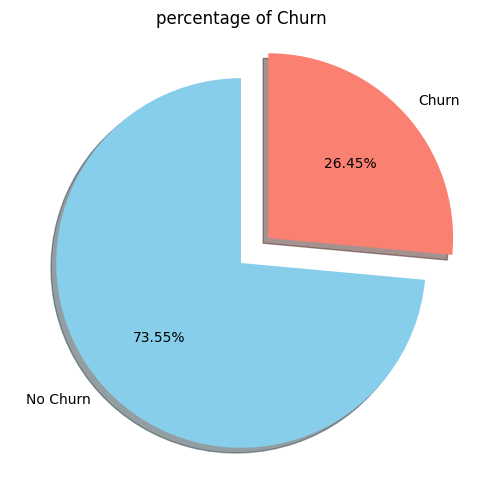

In [ ]:
# Check Balanced

plt.figure(figsize=(8,6))
plt.title('percentage of Churn')
plt.pie(
    x=df['Churn'].value_counts(),
    labels=['No Churn', 'Churn'],
    shadow=True,
    explode=[0.0 ,.2],
    autopct="%.2f%%",
    startangle=90,
    colors=['SkyBlue','Salmon']
    )
plt.show()
# the majority of the Customers are not churn ,that refers to Service is Good

## Correlation of the Data

<Axes: >

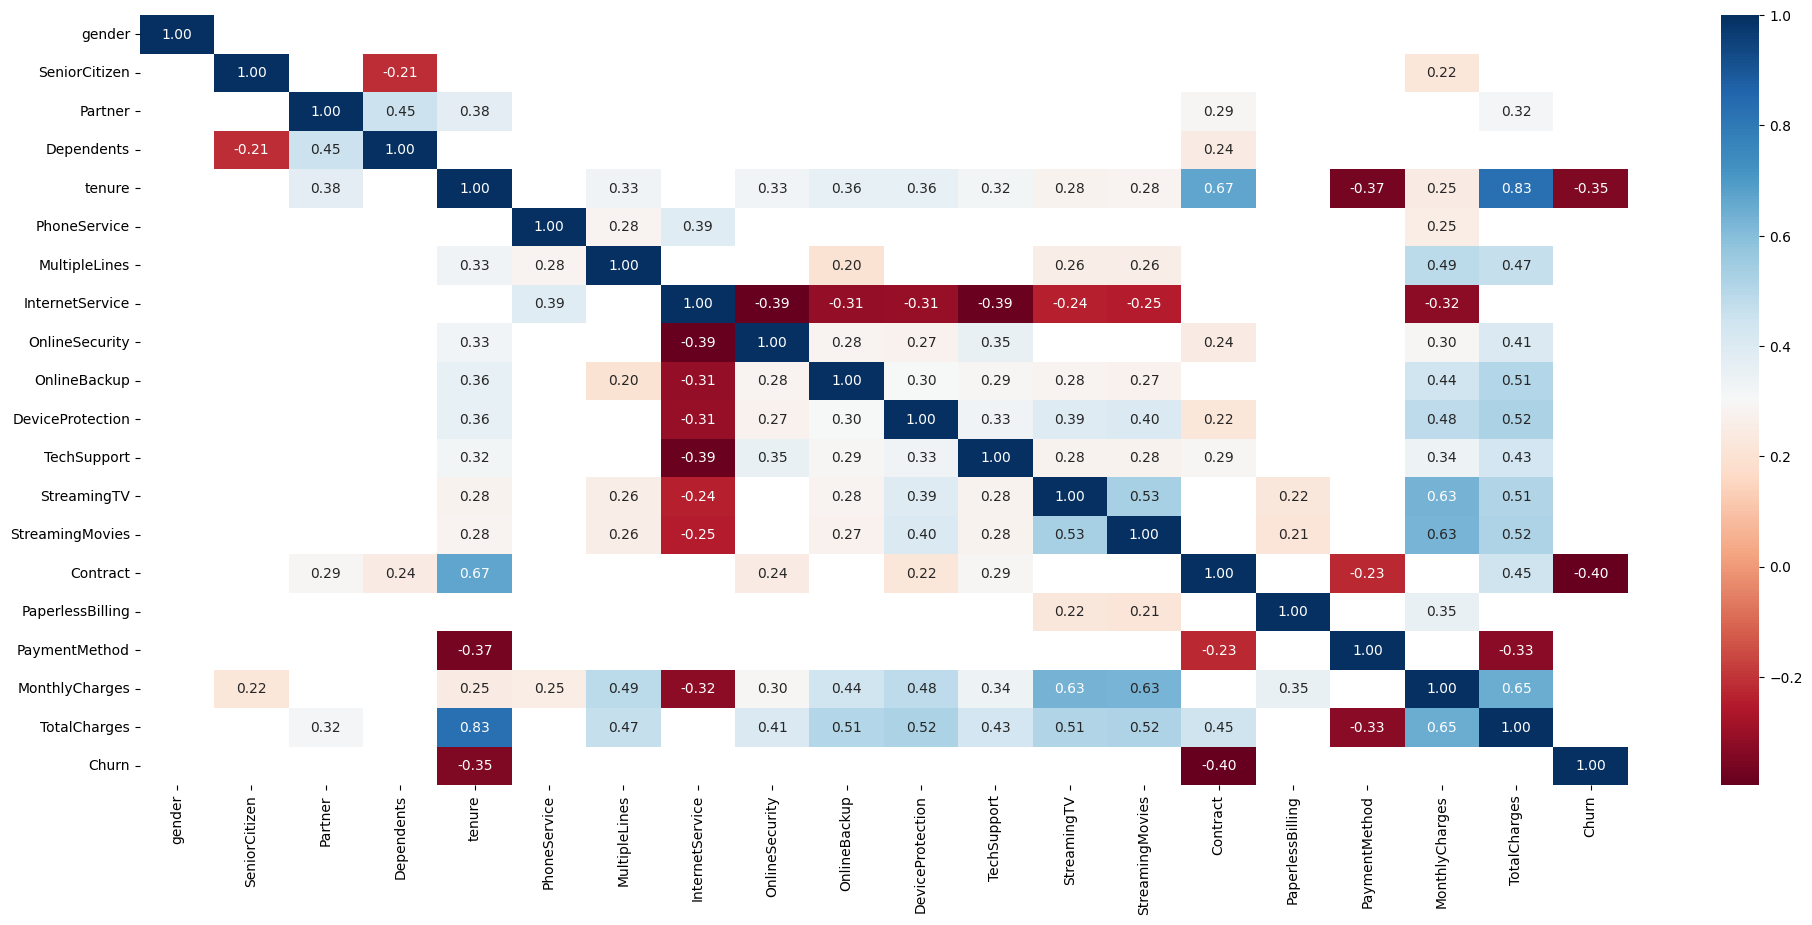

In [ ]:
plt.figure(figsize=(24,10))
sns.heatmap(df.corr(),fmt='.2f',annot=True,cmap = 'RdBu',mask=df.corr().abs()<0.2)

# <center><div style="font-family: Trebuchet MS; background-color: #670010; color: #ffffff; padding: 12px; line-height: 1;">Data Modeling & Evaluate</div></center>

## Spliting Data

In [ ]:
x=df.drop(['Churn','gender'], axis=1)
y=df['Churn']

## Hundeling the Unbalance Data Using SMOTE

In [ ]:
# Hundle unbalance data

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42,sampling_strategy=0.9)
x_res, y_res = smote.fit_resample(x,y)

print(Counter(y_res))
x_res.shape,  y_res.shape

Counter({0: 5164, 1: 4647})


((9811, 18), (9811,))

## Spliting the Data for train & test and Validation

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_res,y_res,test_size=0.15,random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=0.20,random_state=42)

In [ ]:
Accuracy_models=[]
f1_score_models=[]
precision_scores=[]
recall_scores=[]
Models_names=[]

## Function to Train, check Overfitting and Evalute of models

In [ ]:
def evaluate_model_performance(model):
    y_train_pred=model.predict(x_train)
    y_val_pred=model.predict(x_val)
    y_test_pred=model.predict(x_test)

    Train_accuracy = accuracy_score(y_train,y_train_pred)
    Validaion_accuracy = accuracy_score(y_val,y_val_pred)

    Test_accuracy = accuracy_score(y_test,y_test_pred)
    test_recall_score=recall_score(y_test,y_test_pred)
    test_f1_score =f1_score(y_test,y_test_pred)
    precision_score_test=precision_score(y_test,y_test_pred)

    print(f"-Train accuracy: {Train_accuracy*100:.2f}%")
    print(f"-Validation accuracy: {Validaion_accuracy*100:.2f}%")
    print(f"-Test accuracy: {Test_accuracy*100:.2f}%\n")



    print(f'-Accuracy: {Test_accuracy*100:.2f}%')
    print(f'-F1_Score: {test_f1_score*100:.2f}%')
    print(f'-Precision: {precision_score_test*100:.2f}%')
    print(f'-Recall: { test_recall_score*100:.2f}%\n\n')

    plt.figure(figsize=(15,5))
    # Confusion Matrix
    plt.subplot(1, 2, 1)
    sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')

    # ROC Curve
    plt.subplot(1, 2, 2)
    y_test_prob = model.predict_proba(x_test)[:, 1]
    fp, tp, _ = roc_curve(y_test, y_test_prob)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fp, tp, color="r")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.tight_layout(w_pad=5)
    plt.show()

    if abs(Validaion_accuracy - Train_accuracy)*100 > 5:
        print(f"-Overfitting with diff: {abs(Validaion_accuracy - Train_accuracy)*100:.2f}%\n")
        print('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx\n')
    else:
        print(f"-Not Overfitting & Test accuracy: {Test_accuracy*100:.2f}%\n\n")



    Accuracy_models.append(Test_accuracy)
    f1_score_models.append(test_f1_score)
    precision_scores.append(precision_score_test)
    recall_scores.append(test_recall_score)

## DecissionTree model

In [ ]:
decision_tree = DecisionTreeClassifier(random_state=42)
params={'criterion':['gini', 'entropy','log_loss'], 'max_depth':[5, 6, 7, 8,9, 10, 11, 12],'ccp_alpha':[0.001, 0.01, 0.02, 0.03]}

grid=GridSearchCV(estimator=decision_tree,
                  param_grid=params,
                  cv=5,
                  scoring='accuracy')

grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'ccp_alpha': [0.001, 0.01, 0.02, 0.03],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 6, 7, 8, 9, 10, 11, 12]},
             scoring='accuracy')

In [ ]:
finall_decision_tree=grid.best_estimator_
grid.best_params_

{'ccp_alpha': 0.001, 'criterion': 'gini', 'max_depth': 7}

-Train accuracy: 82.36%
-Validation accuracy: 80.64%
-Test accuracy: 80.84%

-Accuracy: 80.84%
-F1_Score: 80.14%
-Precision: 78.70%
-Recall: 81.64%




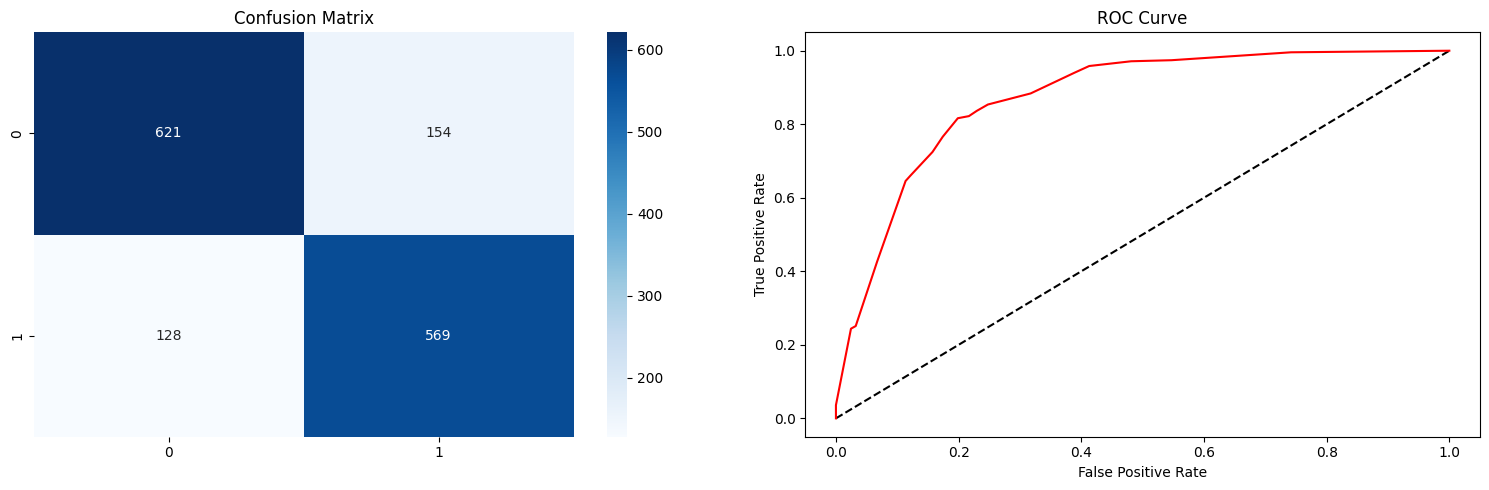

-Not Overfitting & Test accuracy: 80.84%




In [ ]:
evaluate_model_performance(finall_decision_tree)

## **Scaling Data**

In [ ]:
sc=StandardScaler()
x_train[num_col]=sc.fit_transform(x_train[num_col])
x_val[num_col]=sc.transform(x_val[num_col])
x_test[num_col] =sc.transform(x_test[num_col])


In [ ]:
# Pkl Scaler

pkl.dump(sc,open('scaler.pkl','wb'))

## LogisticRegression Model

In [ ]:
lr= LogisticRegression()
params={'multi_class':['ovr','auto'],'C':[0.1,0.2,1,5,10],'penalty':['l1','l2']}
grid=GridSearchCV(estimator=lr,
                  param_grid=params,
                  cv=5,
                  scoring='accuracy')
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.2, 1, 5, 10],
                         'multi_class': ['ovr', 'auto'],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [ ]:
finall_lr=grid.best_estimator_
grid.best_params_

{'C': 0.1, 'multi_class': 'ovr', 'penalty': 'l2'}

-Train accuracy: 81.22%
-Validation accuracy: 79.68%
-Test accuracy: 80.77%

-Accuracy: 80.77%
-F1_Score: 80.17%
-Precision: 78.36%
-Recall: 82.07%




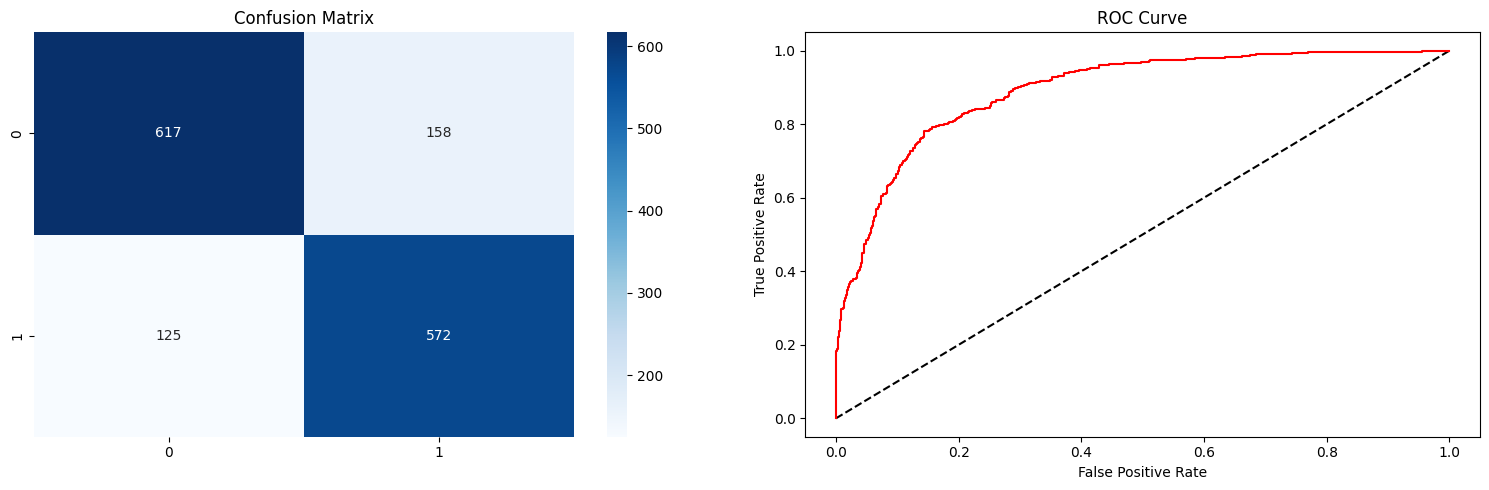

-Not Overfitting & Test accuracy: 80.77%




In [ ]:
evaluate_model_performance(finall_lr)

## Support Vector Classifier Model

In [ ]:
svc=SVC(probability=True,random_state=42)
svc.fit(x_train,y_train)

SVC(probability=True, random_state=42)

-Train accuracy: 83.80%
-Validation accuracy: 81.29%
-Test accuracy: 81.73%

-Accuracy: 81.73%
-F1_Score: 80.46%
-Precision: 81.47%
-Recall: 79.48%




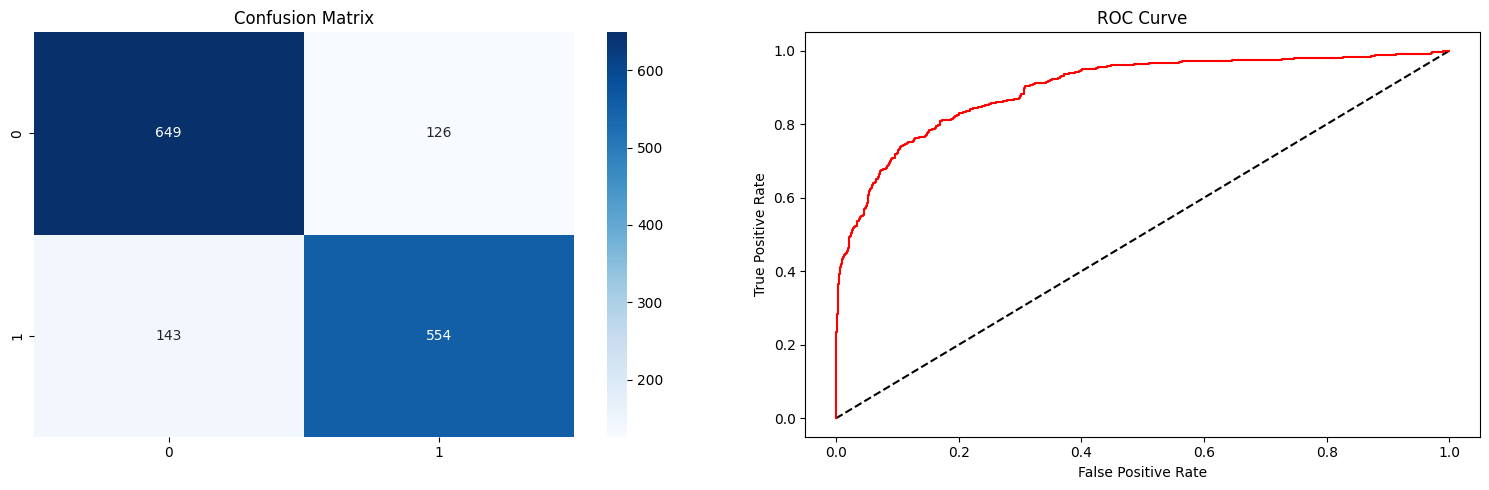

-Not Overfitting & Test accuracy: 81.73%




In [ ]:
evaluate_model_performance(svc)

## Random Forest Model

In [ ]:
random_forest=RandomForestClassifier(random_state=42,ccp_alpha=0.001)
random_forest.fit(x_train,y_train)

RandomForestClassifier(ccp_alpha=0.001, random_state=42)

-Train accuracy: 83.66%
-Validation accuracy: 80.70%
-Test accuracy: 81.45%

-Accuracy: 81.45%
-F1_Score: 80.57%
-Precision: 79.94%
-Recall: 81.21%




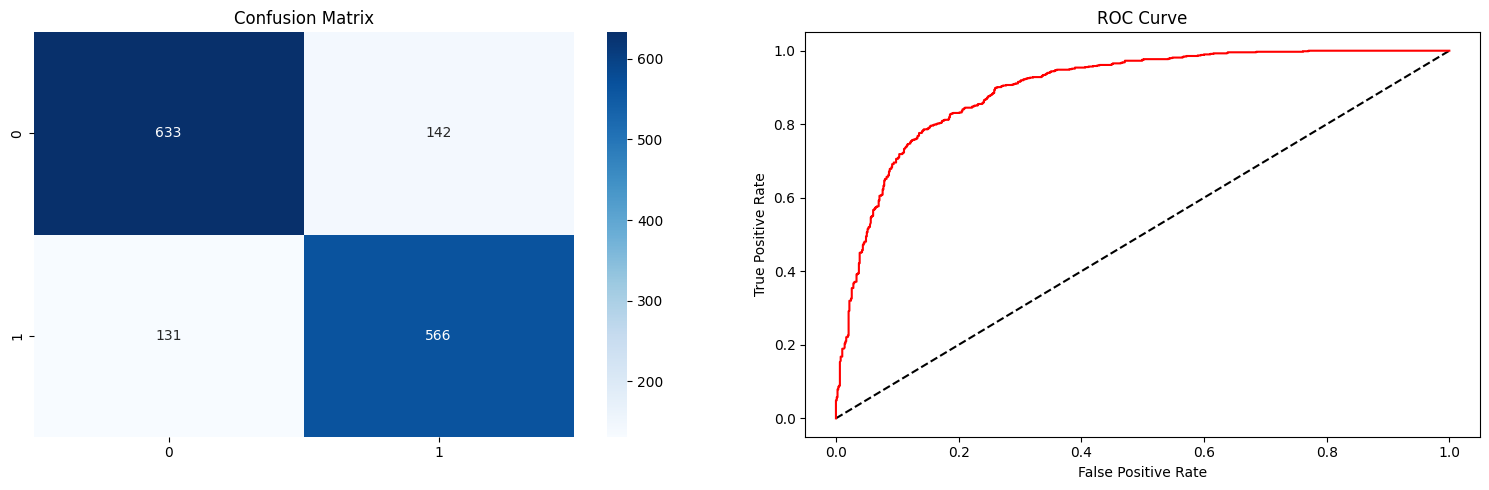

-Not Overfitting & Test accuracy: 81.45%




In [ ]:
evaluate_model_performance(random_forest)

## KNN Model

In [ ]:
knn=KNeighborsClassifier(n_neighbors=12,p=2)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=12)

-Train accuracy: 83.24%
-Validation accuracy: 78.60%
-Test accuracy: 81.18%

-Accuracy: 81.18%
-F1_Score: 81.27%
-Precision: 76.85%
-Recall: 86.23%




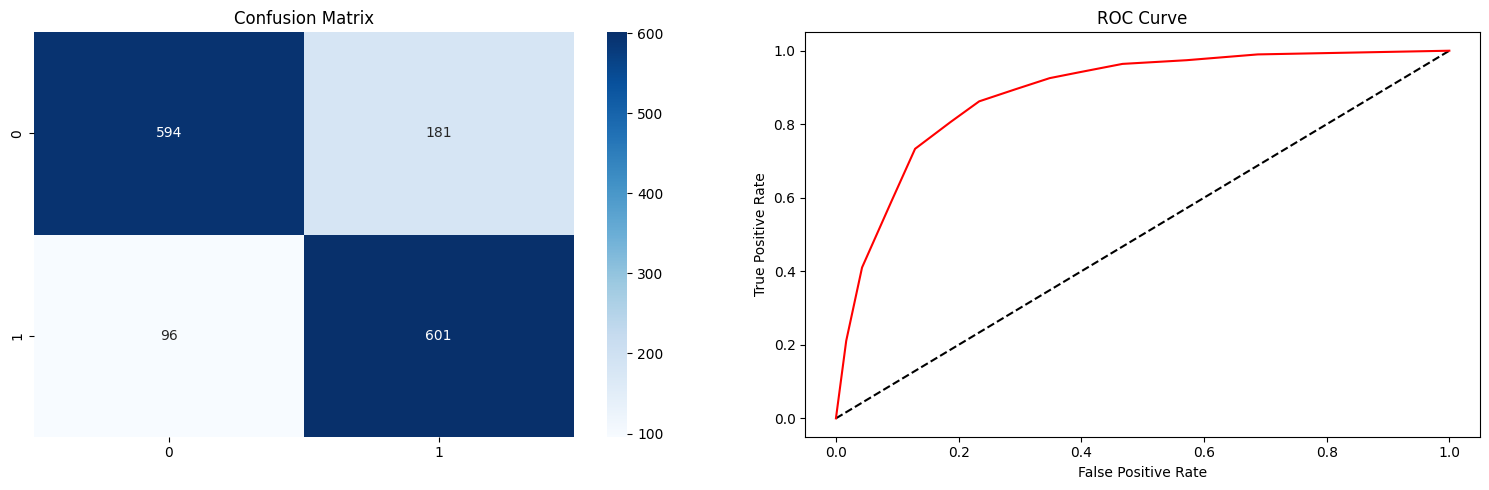

-Not Overfitting & Test accuracy: 81.18%




In [ ]:
evaluate_model_performance(knn)

## GradientBoosting Model

In [ ]:
gradient_boosting=GradientBoostingClassifier(n_estimators=100,
                                            learning_rate=0.5,
                                            max_depth=2,
                                            random_state=42)
gradient_boosting.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.5, max_depth=2, random_state=42)

-Train accuracy: 85.71%
-Validation accuracy: 82.43%
-Test accuracy: 83.08%

-Accuracy: 83.08%
-F1_Score: 82.28%
-Precision: 81.64%
-Recall: 82.93%




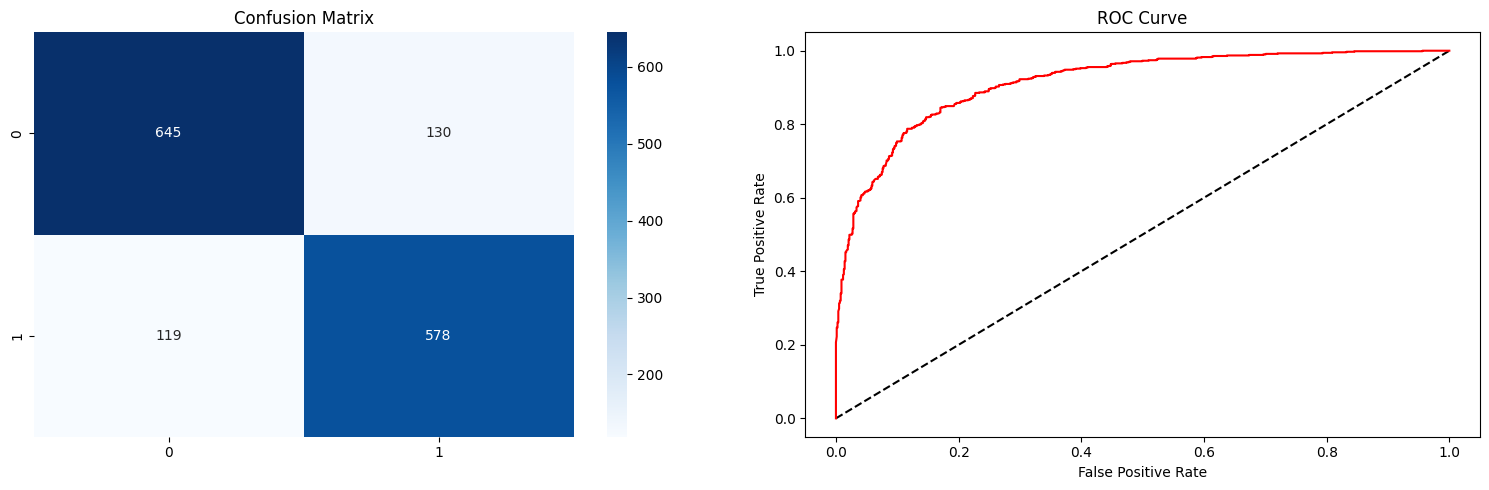

-Not Overfitting & Test accuracy: 83.08%




In [ ]:
evaluate_model_performance(gradient_boosting)

## XGBoost Model

In [ ]:
xgboost=XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
xgboost.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

-Train accuracy: 84.65%
-Validation accuracy: 81.65%
-Test accuracy: 83.76%

-Accuracy: 83.76%
-F1_Score: 83.32%
-Precision: 81.11%
-Recall: 85.65%




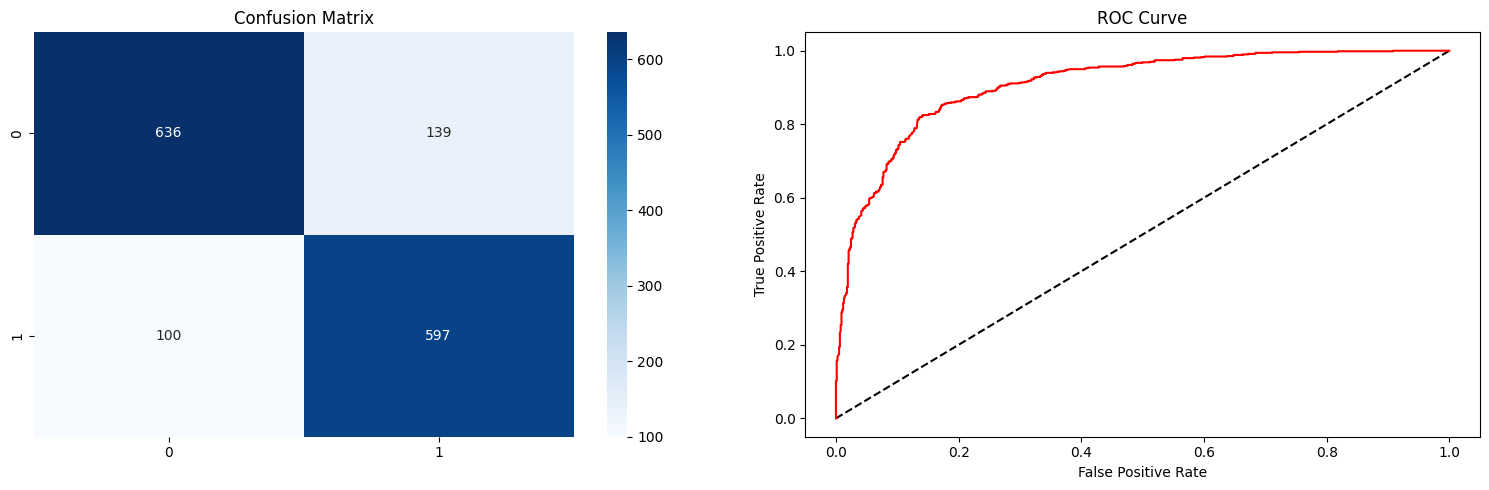

-Not Overfitting & Test accuracy: 83.76%




In [ ]:
evaluate_model_performance(xgboost)

## AdaBoost Model

In [ ]:
adaboost=AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),
                            n_estimators=100,
                            learning_rate=0.1,
                            random_state=42)
adaboost.fit(x_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.1, n_estimators=100, random_state=42)

-Train accuracy: 85.49%
-Validation accuracy: 82.13%
-Test accuracy: 83.42%

-Accuracy: 83.42%
-F1_Score: 82.98%
-Precision: 80.73%
-Recall: 85.37%




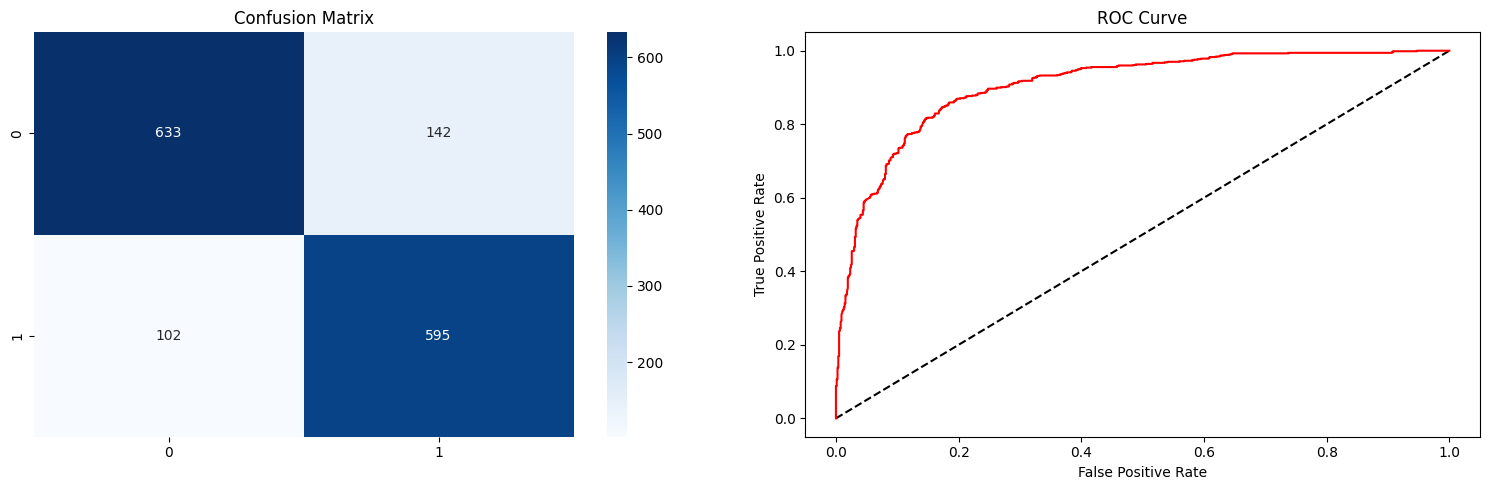

-Not Overfitting & Test accuracy: 83.42%




In [ ]:
evaluate_model_performance(adaboost)

## Stacking

In [ ]:
base_models = [('rf',RandomForestClassifier(max_depth= 4, n_estimators= 100)),
               ('xgb', XGBClassifier(n_estimators=90, max_depth=4, learning_rate=0.2, random_state=42))]

meta_model = LogisticRegression()
stacking = StackingClassifier(estimators=base_models,
                              final_estimator=meta_model
                              )
stacking.fit(x_train, y_train)

StackingClassifier(estimators=[('rf', RandomForestClassifier(max_depth=4)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=0.2, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=4,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=90, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=42, ...))],
                   final_estimator=LogisticRegression())

-Train accuracy: 87.62%
-Validation accuracy: 84.11%
-Test accuracy: 84.58%

-Accuracy: 84.58%
-F1_Score: 83.91%
-Precision: 82.91%
-Recall: 84.94%




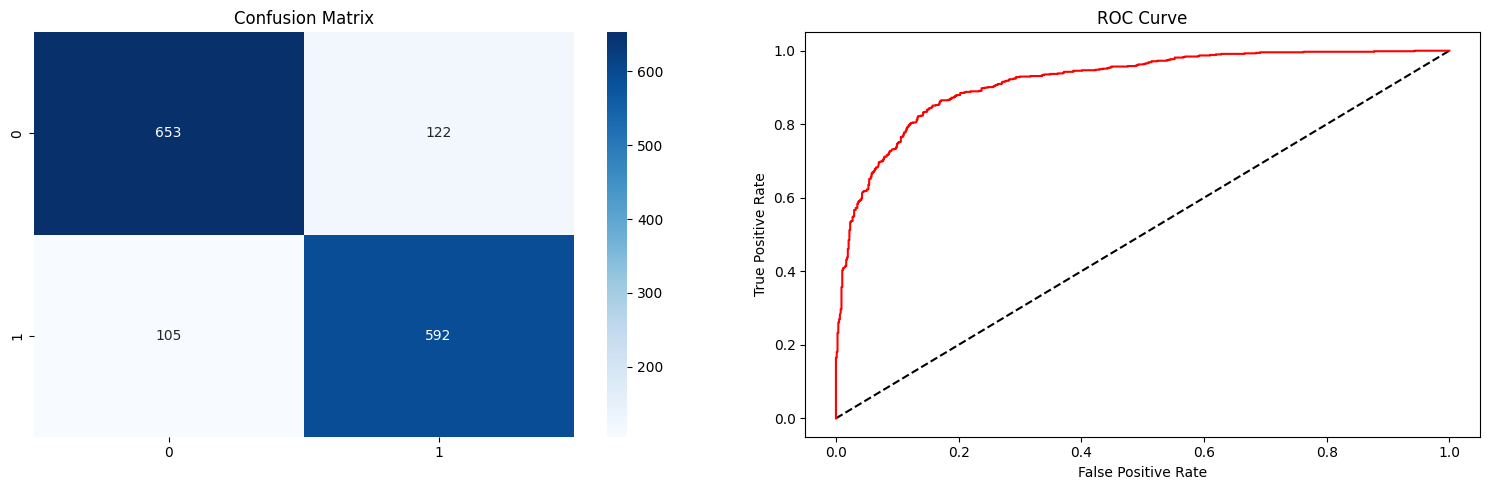

-Not Overfitting & Test accuracy: 84.58%




In [ ]:
evaluate_model_performance(stacking)

In [ ]:
for name in ['Decision Tree','LogisticRegression','SVC','RandomForest','KNN','GradientBoosting','XGBoost','AdaBoost','Stacking']:
    Models_names.append(name)

In [ ]:
print(Models_names)
print(Accuracy_models)
print(f1_score_models)
print(precision_scores)

['Decision Tree', 'LogisticRegression', 'SVC', 'RandomForest', 'KNN', 'GradientBoosting', 'XGBoost', 'AdaBoost', 'Stacking']
[0.8084239130434783, 0.8077445652173914, 0.8172554347826086, 0.8145380434782609, 0.8118206521739131, 0.8308423913043478, 0.8376358695652174, 0.8342391304347826, 0.8457880434782609]
[0.8014084507042254, 0.8016818500350386, 0.8046477850399419, 0.805693950177936, 0.8127112914131169, 0.8227758007117437, 0.8332170272156315, 0.8298465829846583, 0.8391211906449326]
[0.7869986168741355, 0.7835616438356164, 0.8147058823529412, 0.7994350282485876, 0.768542199488491, 0.8163841807909604, 0.811141304347826, 0.8073270013568521, 0.8291316526610645]


# <center><div style="font-family: Trebuchet MS; background-color: #670010; color: #ffffff; padding: 12px; line-height: 1;">Accuracy Compare</div></center>
- Accuracy Compare


In [ ]:
model_accuracy=pd.DataFrame({ 'Model':Models_names,'Accuracy':Accuracy_models,'Precision':precision_scores,'F1_Score':f1_score_models,'Recall':recall_scores }).sort_values(by='Accuracy',ascending=False)
model_accuracy.reset_index(inplace=True,drop=True)
model_accuracy

,Model,Accuracy,Precision,F1_Score,Recall
0,Stacking,0.845788,0.829132,0.839121,0.849354
1,XGBoost,0.837636,0.811141,0.833217,0.856528
2,AdaBoost,0.834239,0.807327,0.829847,0.853659
3,GradientBoosting,0.830842,0.816384,0.822776,0.829268
4,SVC,0.817255,0.814706,0.804648,0.794835
5,RandomForest,0.814538,0.799435,0.805694,0.812052
6,KNN,0.811821,0.768542,0.812711,0.862267
7,Decision Tree,0.808424,0.786999,0.801408,0.816356
8,LogisticRegression,0.807745,0.783562,0.801682,0.820660


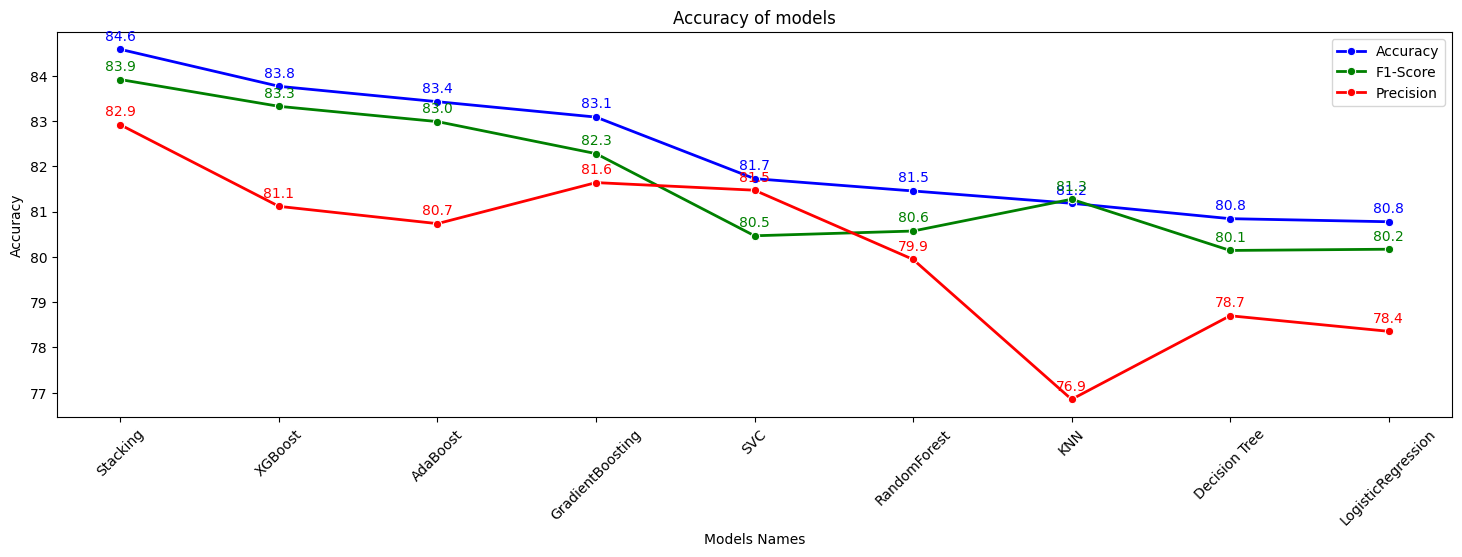

In [ ]:
plt.figure(figsize=(18,5))

sns.lineplot(x=model_accuracy['Model'], y=model_accuracy['Accuracy']*100, marker='o', color='b', lw=2, label='Accuracy')
for i, score in enumerate(model_accuracy['Accuracy']):
    plt.text(i, score*100 + 0.2, f'{score*100:.1f}', ha='center', color='b')

sns.lineplot(x=model_accuracy['Model'],y=model_accuracy['F1_Score']*100,marker='o',color='g',lw=2,label='F1-Score')
for i, score in enumerate(model_accuracy['F1_Score']):
    plt.text(i, score*100 + 0.2, f'{score*100:.1f}', ha='center', color='g')

sns.lineplot(x=model_accuracy['Model'],y=model_accuracy['Precision']*100,marker='o',color='r',lw=2,label='Precision')
for i, score in enumerate(model_accuracy['Precision']):
    plt.text(i, score*100 + 0.2, f'{score*100:.1f}', ha='center', color='r')


plt.legend()
plt.xticks(rotation=45)

plt.xlabel('Models Names')
plt.ylabel('Accuracy')
plt.title('Accuracy of models')
plt.show()

In [ ]:
best_accuracy= model_accuracy.sort_values(by='Accuracy',ascending=False).reset_index(drop=True)
best_precision=model_accuracy.sort_values(by='Precision',ascending=False).reset_index(drop=True)
best_f1_score=model_accuracy.sort_values(by='F1_Score',ascending=False).reset_index(drop=True)
best_recall=model_accuracy.sort_values(by='Recall',ascending=False).reset_index(drop=True)


print(f'Best Accuracy Model: {best_accuracy.Model[0]} With accuracy: {best_accuracy.Accuracy[0]*100:0.2f}%')
print(f'Best F1_Score Model: {best_f1_score.Model[0]} With F1_Score: {best_f1_score.F1_Score[0]*100:0.2f}%')
print(f'Best Precision Model: {best_precision.Model[0]} With Precision: {best_precision.Precision[0]*100:0.2f}%')
print(f'Best Recall Model: {best_precision.Model[0]} With Recall: {best_recall.Recall[0]*100:0.2f}%')

Best Accuracy Model: Stacking With accuracy: 84.58%
Best F1_Score Model: Stacking With F1_Score: 83.91%
Best Precision Model: Stacking With Precision: 82.91%
Best Recall Model: Stacking With Recall: 86.23%


> Note:
-  Stacking is the best model

In [ ]:
models=[finall_decision_tree, finall_lr, svc, random_forest, knn, gradient_boosting, xgboost, adaboost, stacking]
for model,name in zip(models,Models_names):
    pkl.dump(model,open(f'{name}.pkl','wb'))

# **Links for Deployment app & Dashboard**

**[Open Pressentation](https://www.canva.com/design/DAGUQfLkU9o/2op6EQj4oriYjfKwJ_Q-IA/edit?utm_content=DAGUQfLkU9o&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton)**

**[Open Deployment](https://telecomcustomerchurn-ali-waleed-osama-ahlam-gemy.streamlit.app/)**

---




**[Open Dashboard](https://app.powerbi.com/view?r=eyJrIjoiZTYxYTVjNWUtZDljNS00MjlmLTk2Y2YtOTM2ZjUwYmEzZWVlIiwidCI6IjhmY2Y0Y2Q5LTJmZTQtNDU3MS04NDMxLWIxN2MzZjI5ZWZiMyJ9)**

---




> You're welcome! I'm glad I could help. If you have any more questions in the future, feel free to ask. Happy coding and good luck with your customer churn analysis! 😊